In [1]:
from tweepy import OAuth1UserHandler, API, Cursor
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from collections import Counter as counter
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

import googletrans
from googletrans import Translator
translator = Translator()

plt.style.use('fivethirtyeight')
# sns.set(rc={'figure.figsize':(50, 50)})

pd.set_option('display.max_columns',1000)
# pd.set_option('display.max_row',500)
pd.set_option('display.width',1000)

In [2]:
df = pd.read_csv("final_Topglove_withLabel.csv")

In [3]:
df['ori'] = df['text'].copy()

In [4]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,text,Difference,label,ori
0,0,2019-01-02,1.873333,1.893333,1.853333,1.860000,1.602780,4561800,first day opening bell already keong kan liao...,-0.711726,Negative,first day opening bell already keong kan liao...
1,1,2019-01-03,1.866666,1.883333,1.850000,1.850000,1.594163,6920400,when is the dividend payout this year? ex da...,-0.892822,Negative,when is the dividend payout this year? ex da...
2,2,2019-01-04,1.856666,1.860000,1.836666,1.846666,1.591290,5903400,bad drop recession sell sad loss,-0.538600,Negative,bad drop recession sell sad loss
3,3,2019-01-07,1.853333,1.860000,1.750000,1.766666,1.522354,40581900,Kenanga the best IB? not enof low. drop so ...,-4.676278,Negative,Kenanga the best IB? not enof low. drop so ...
4,4,2019-01-08,1.766666,1.766666,1.670000,1.676666,1.444800,67871700,"Hopefully technical rebound tomorrow, morning...",-5.094342,Negative,"Hopefully technical rebound tomorrow, morning..."
...,...,...,...,...,...,...,...,...,...,...,...,...
732,732,2021-12-24,2.160000,2.220000,2.130000,2.190000,2.190000,12155800,Good morning all who will have the upper hand...,1.388889,Positive,Good morning all who will have the upper hand...
733,733,2021-12-27,2.250000,2.450000,2.210000,2.360000,2.360000,38963400,"@UlarSawi, Klci sudah bocor sebab glove coun...",4.888889,Positive,"@UlarSawi, Klci sudah bocor sebab glove coun..."
734,734,2021-12-28,2.370000,2.410000,2.300000,2.370000,2.370000,18604700,Lets go Topglove ! Green d Gloves industry ...,0.000000,Neutral,Lets go Topglove ! Green d Gloves industry ...
735,735,2021-12-29,2.380000,2.480000,2.360000,2.410000,2.410000,22588800,Post removed.Why? hahahahaha......scary <br...,1.260504,Positive,Post removed.Why? hahahahaha......scary <br...


# EDA

In [5]:
df['eda'] =df['text'].apply(lambda x: nltk.word_tokenize(x))

In [6]:
words = df['eda']
allwords = []
for wordlist in words:
    allwords += wordlist
# print(allwords)

In [7]:
pos_tweets = df['eda'][df["label"] == 'Positive']
pos_words = []
for wordlist in pos_tweets:
    pos_words += wordlist
# print(pos_words)

In [8]:
neg_tweets = df['eda'][df["label"] == 'Negative']
neg_words = []
for wordlist in neg_tweets:
    neg_words += wordlist
# print(neg_words)

In [9]:
neu_tweets = df['eda'][df["label"] == 'Neutral']
neu_words = []
for wordlist in neu_tweets:
    neu_words += wordlist
# print(neu_words)

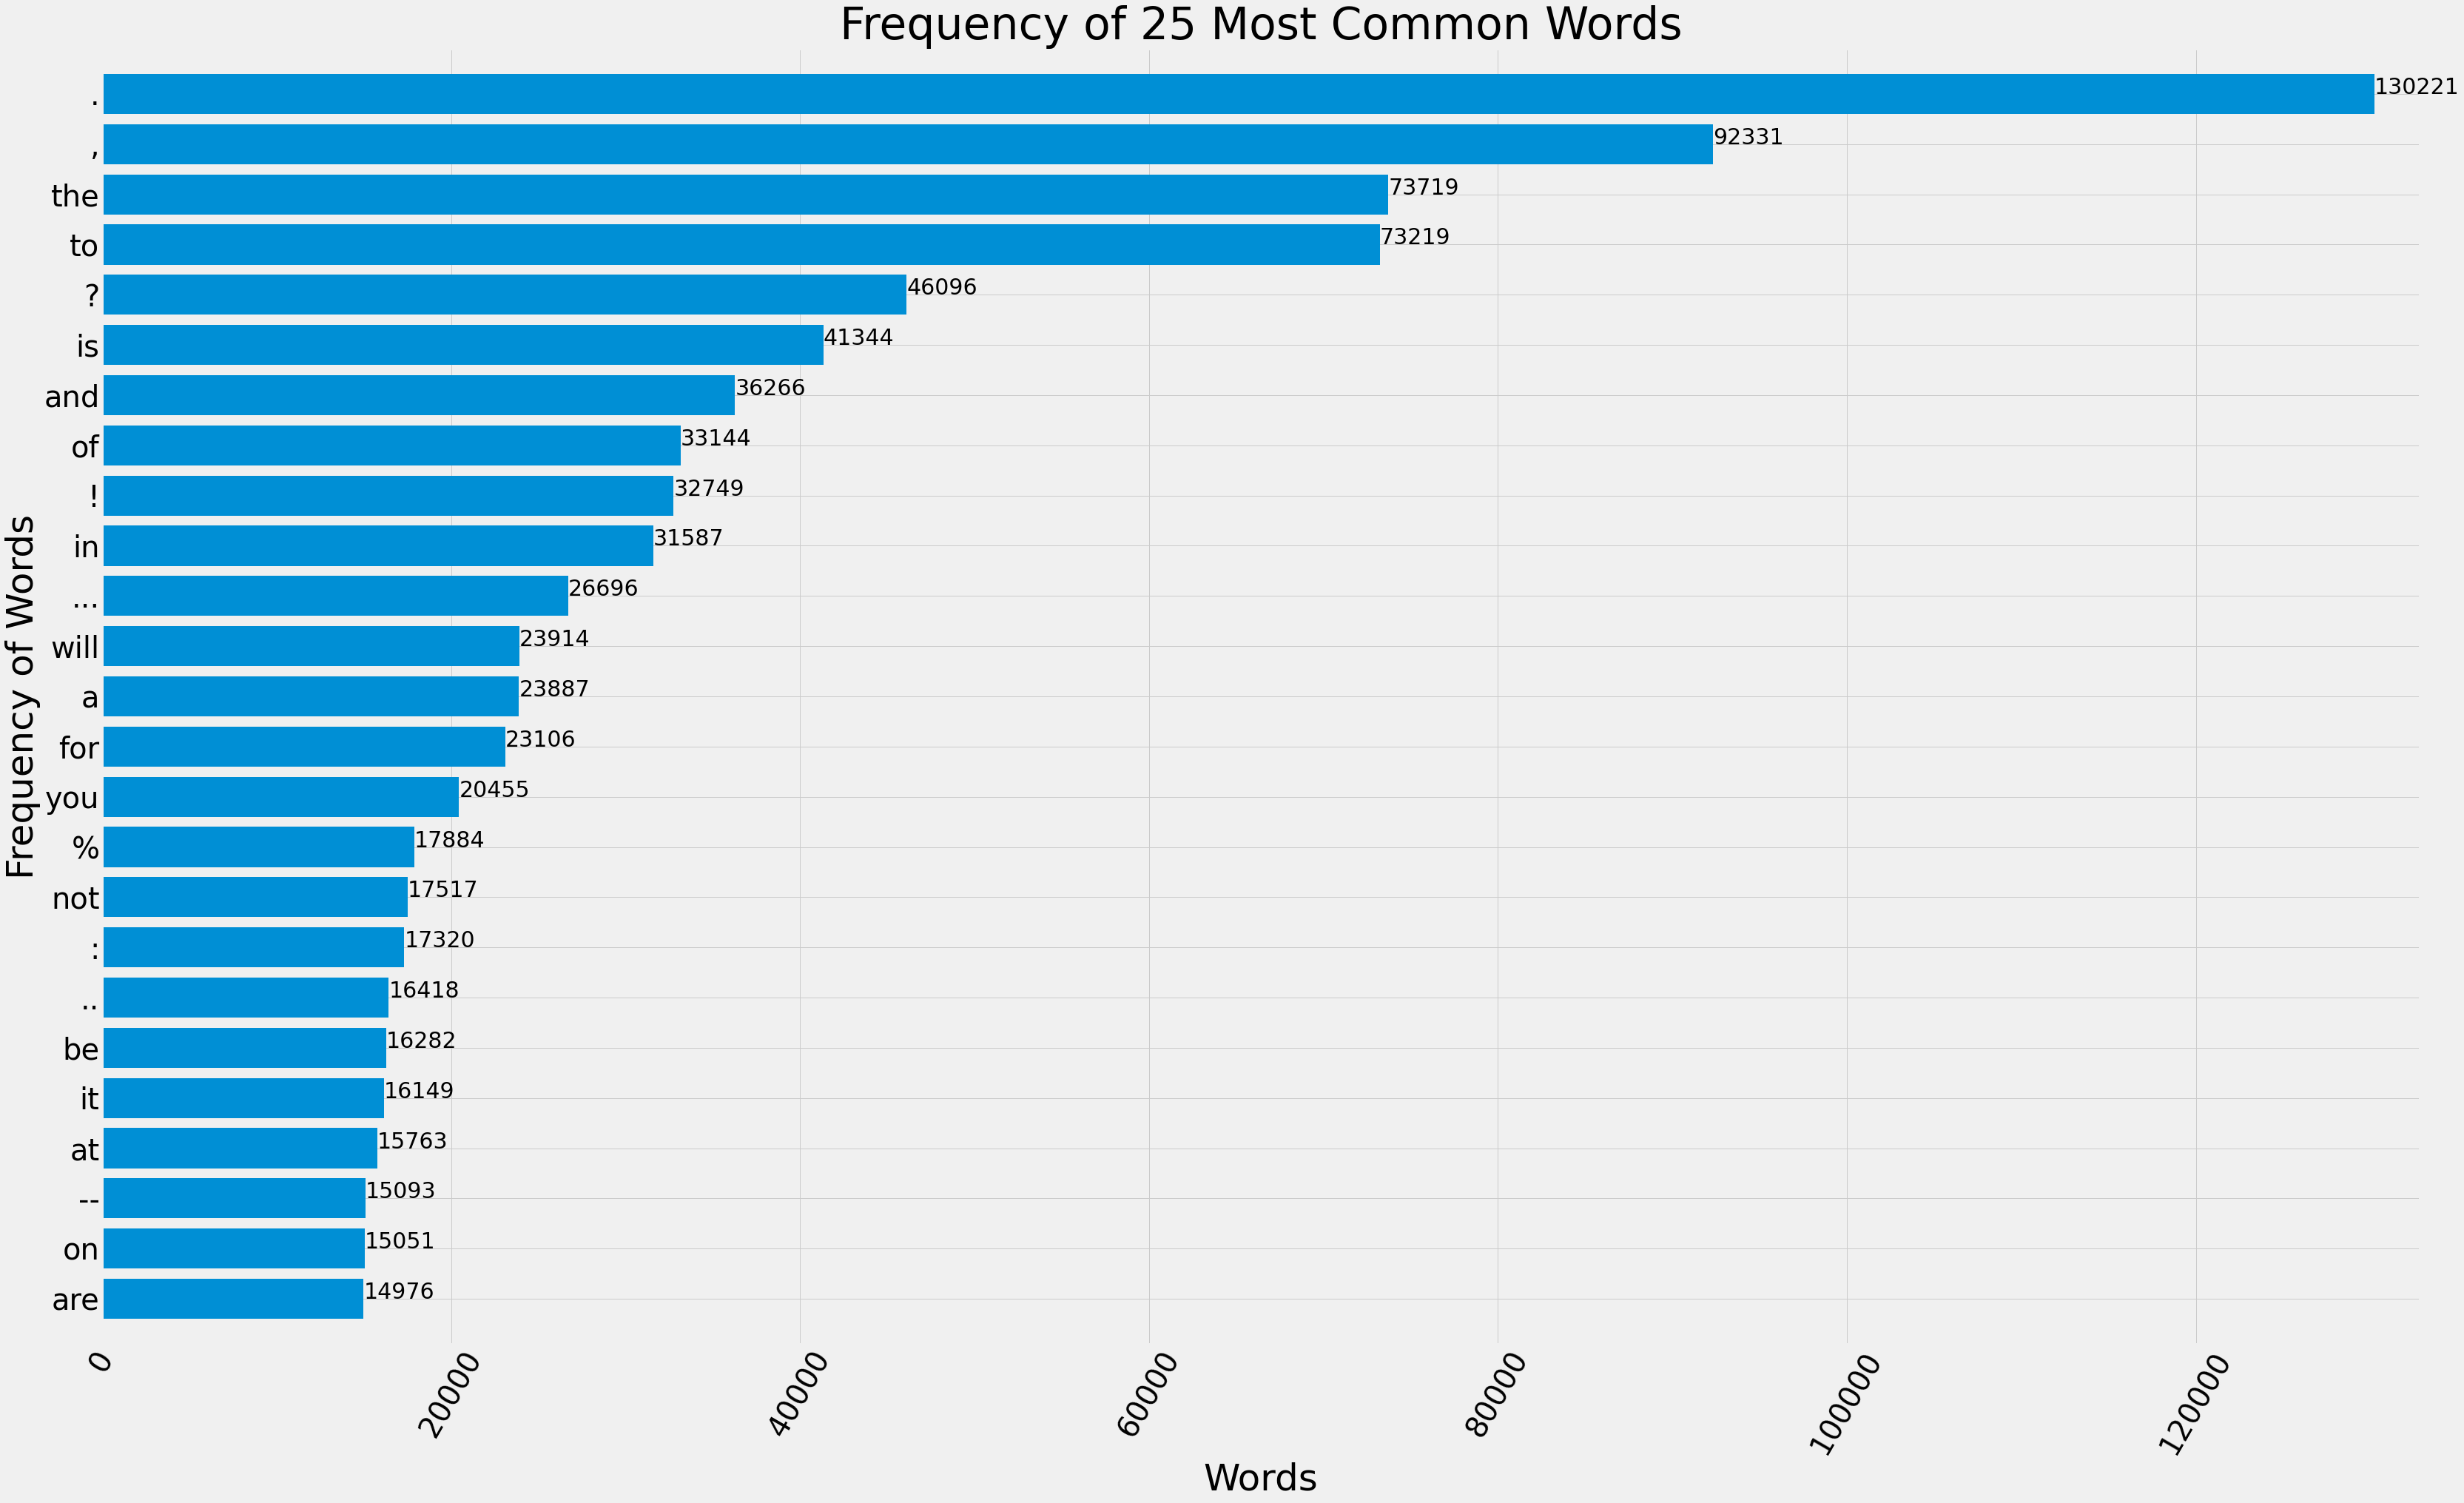

In [10]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

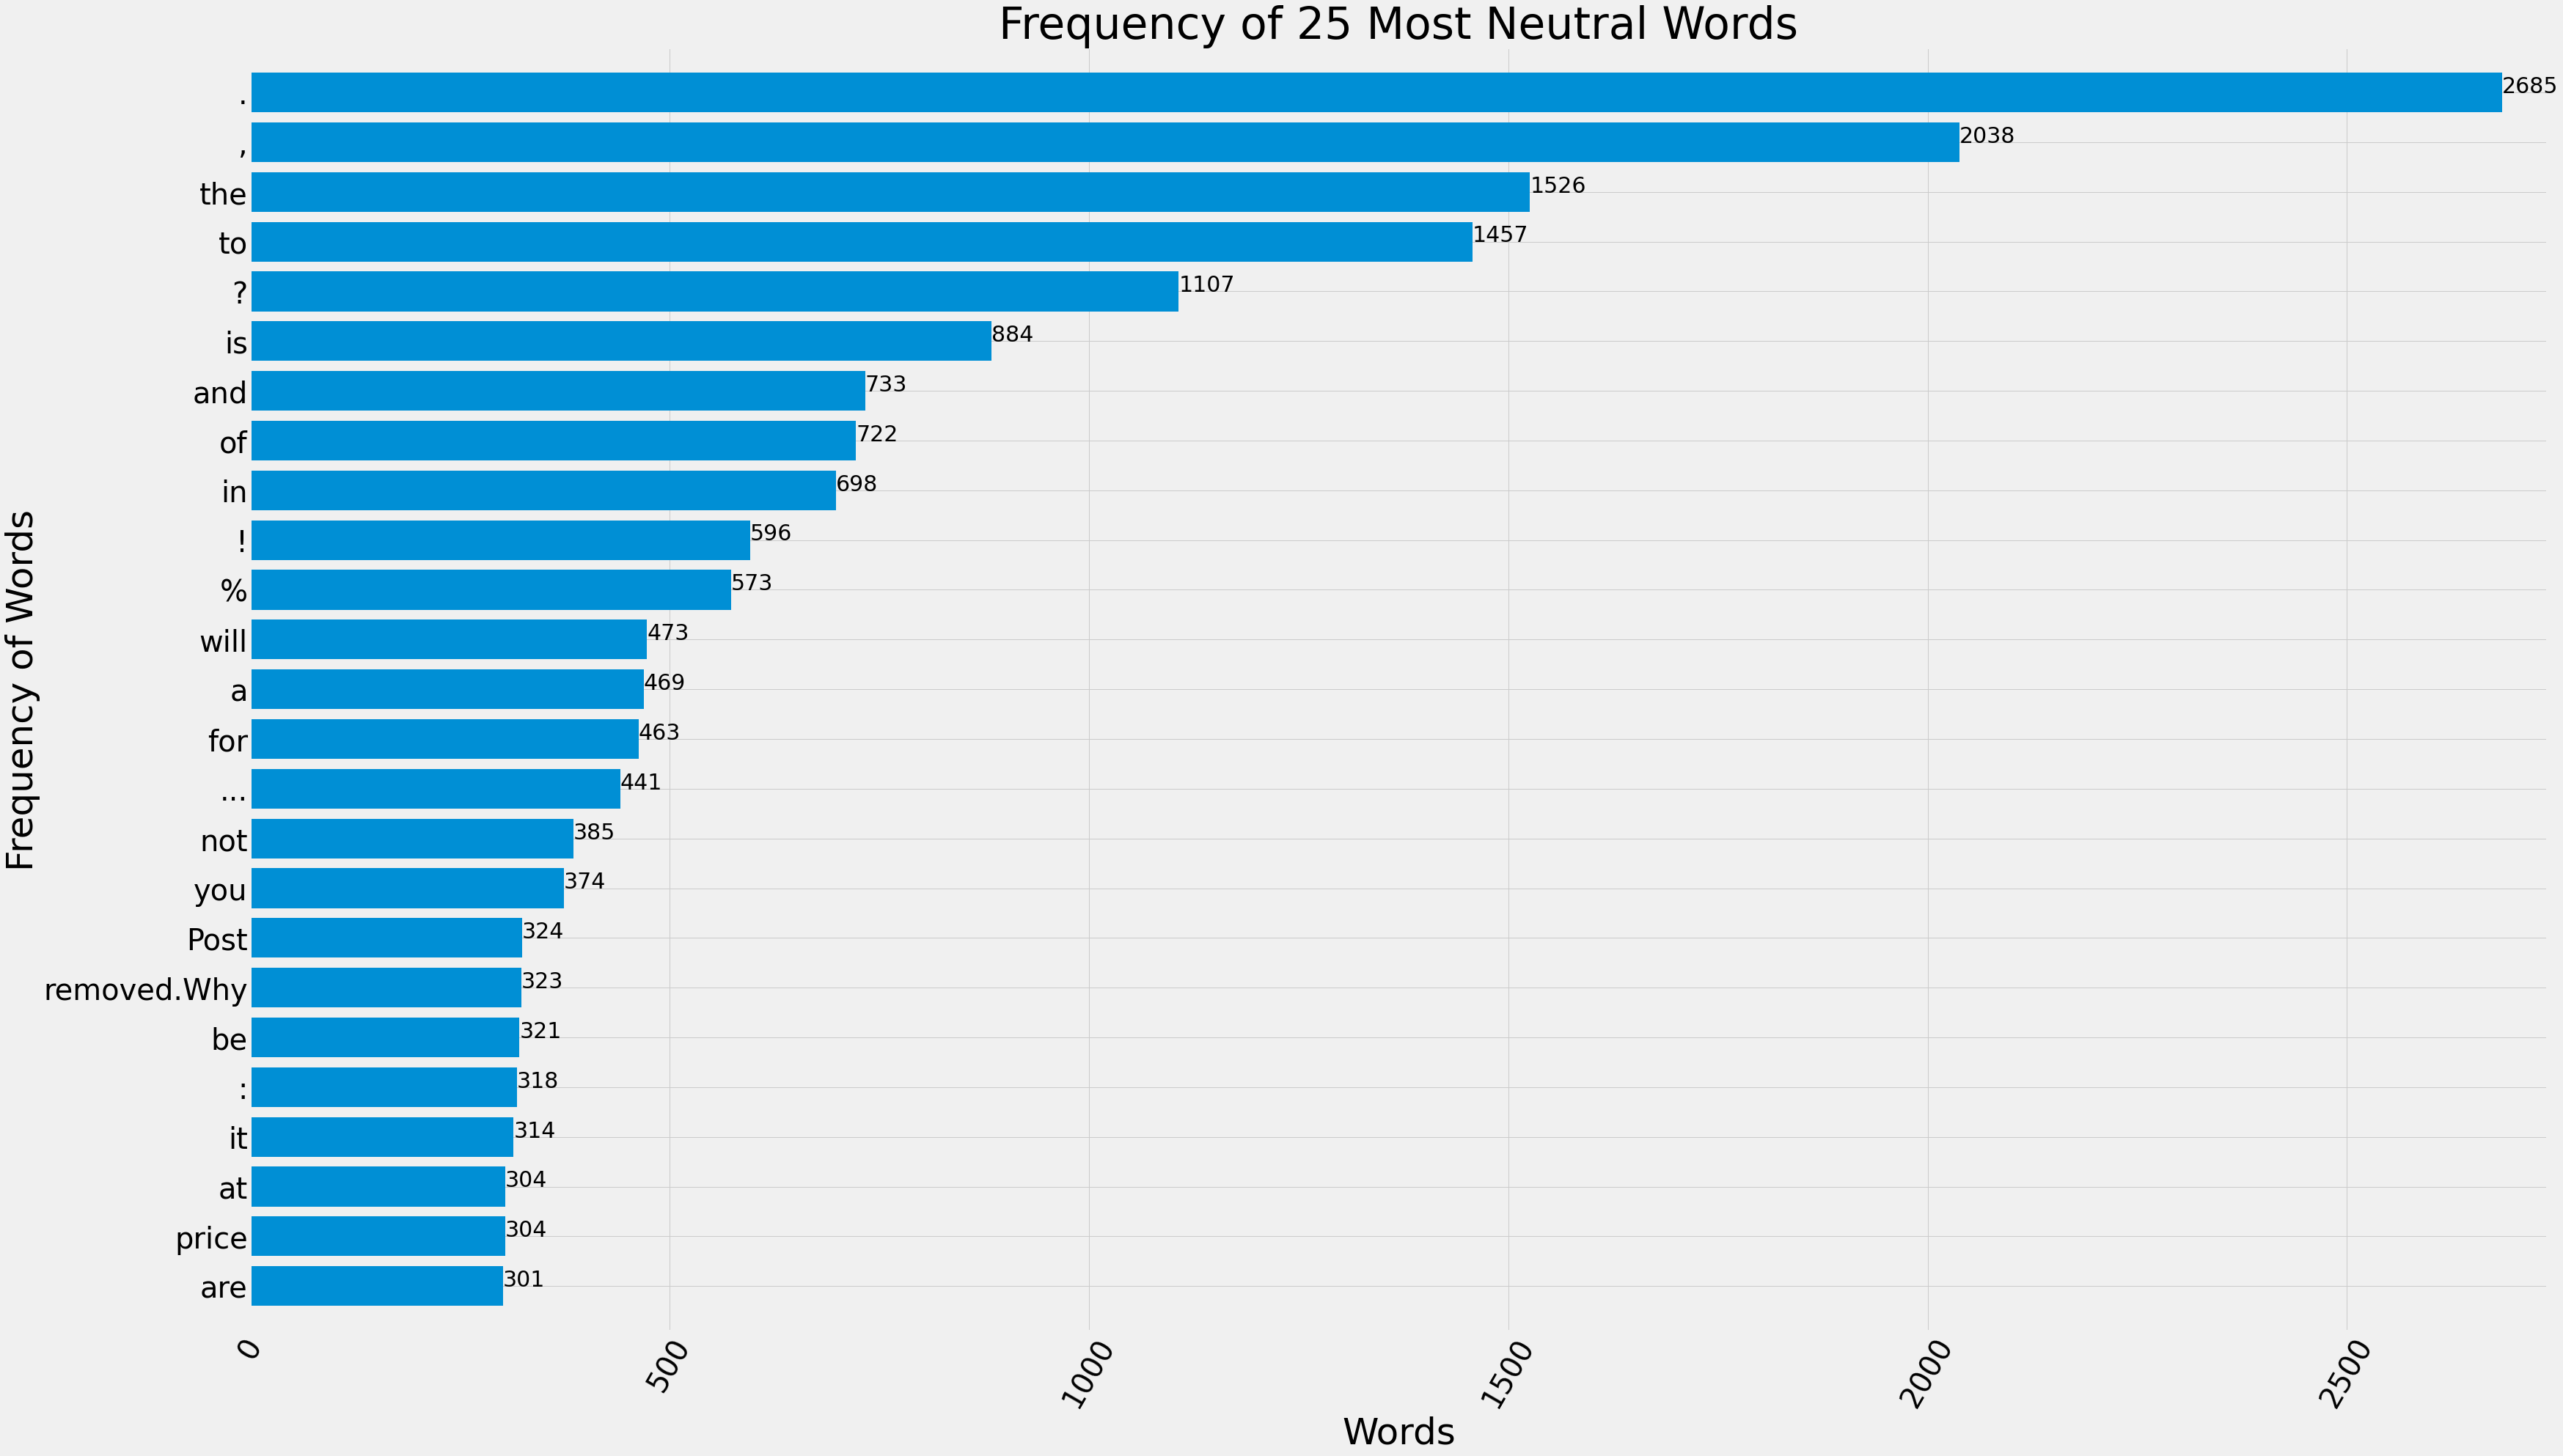

In [11]:
mostcommon_small = FreqDist(neu_words).most_common(25)
x, y = zip(*mostcommon_small)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Neutral Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

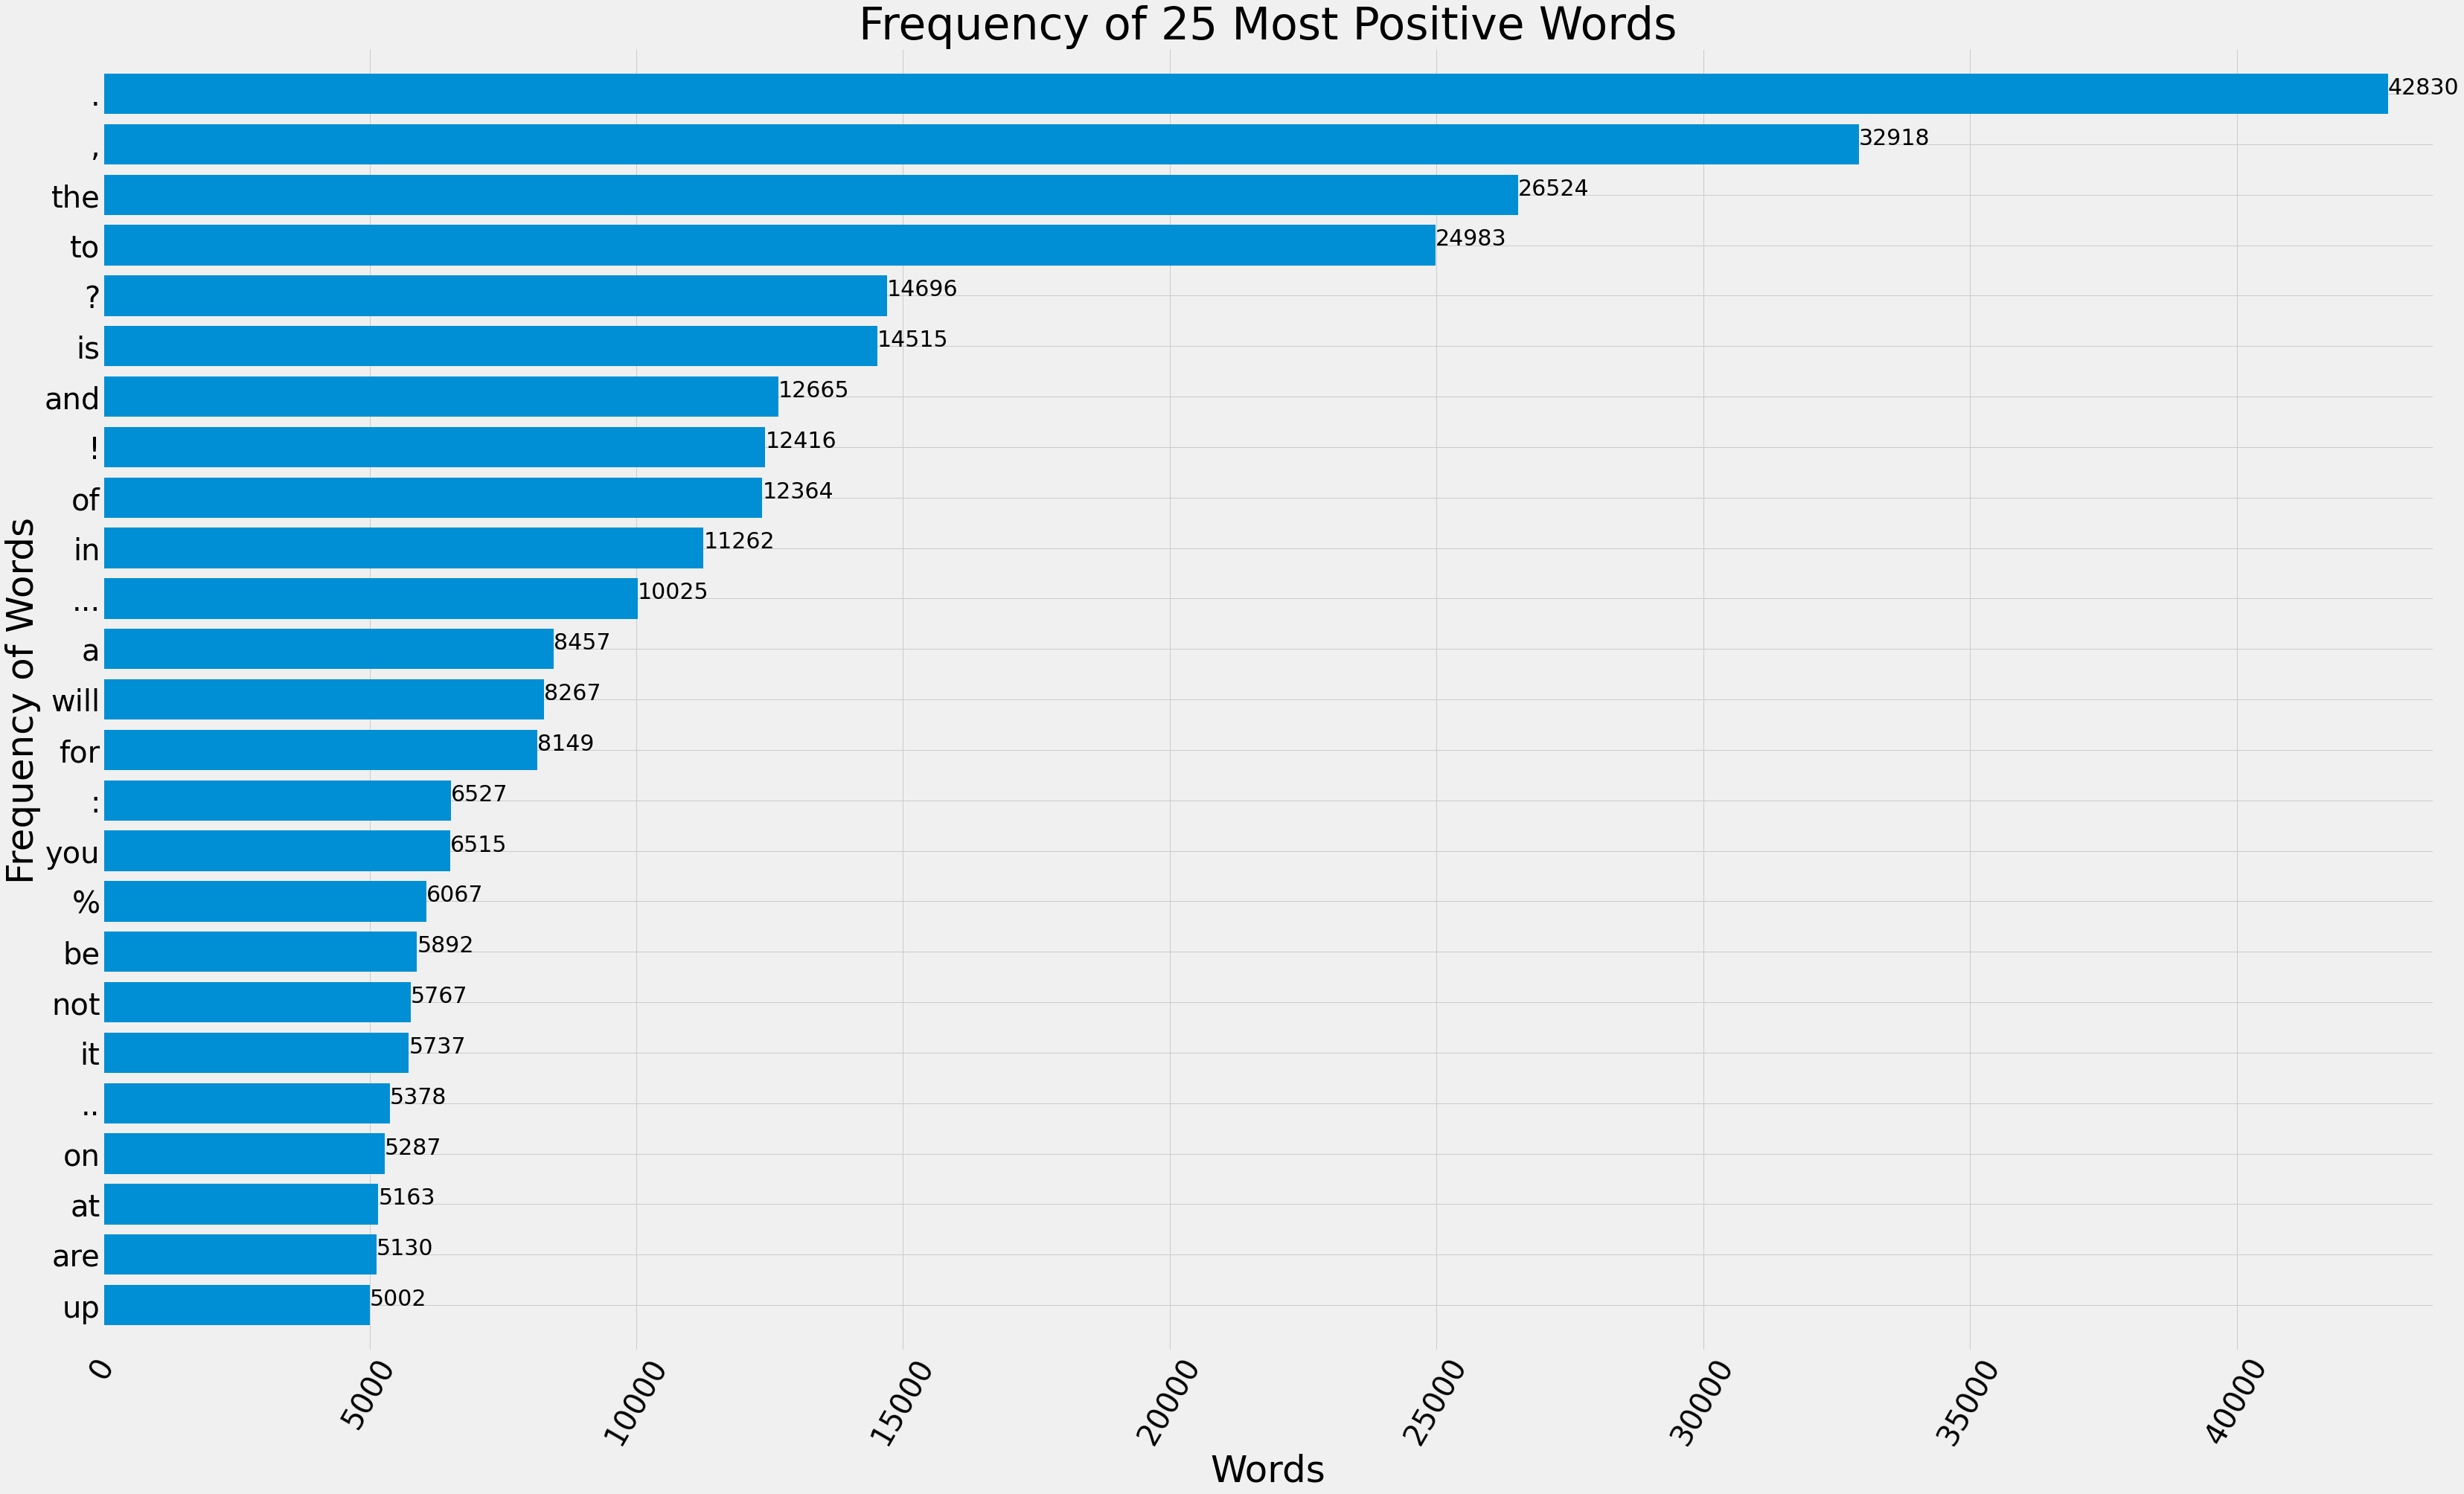

In [12]:
mostcommon_pos = FreqDist(pos_words).most_common(25)
x, y = zip(*mostcommon_pos)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Positive Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

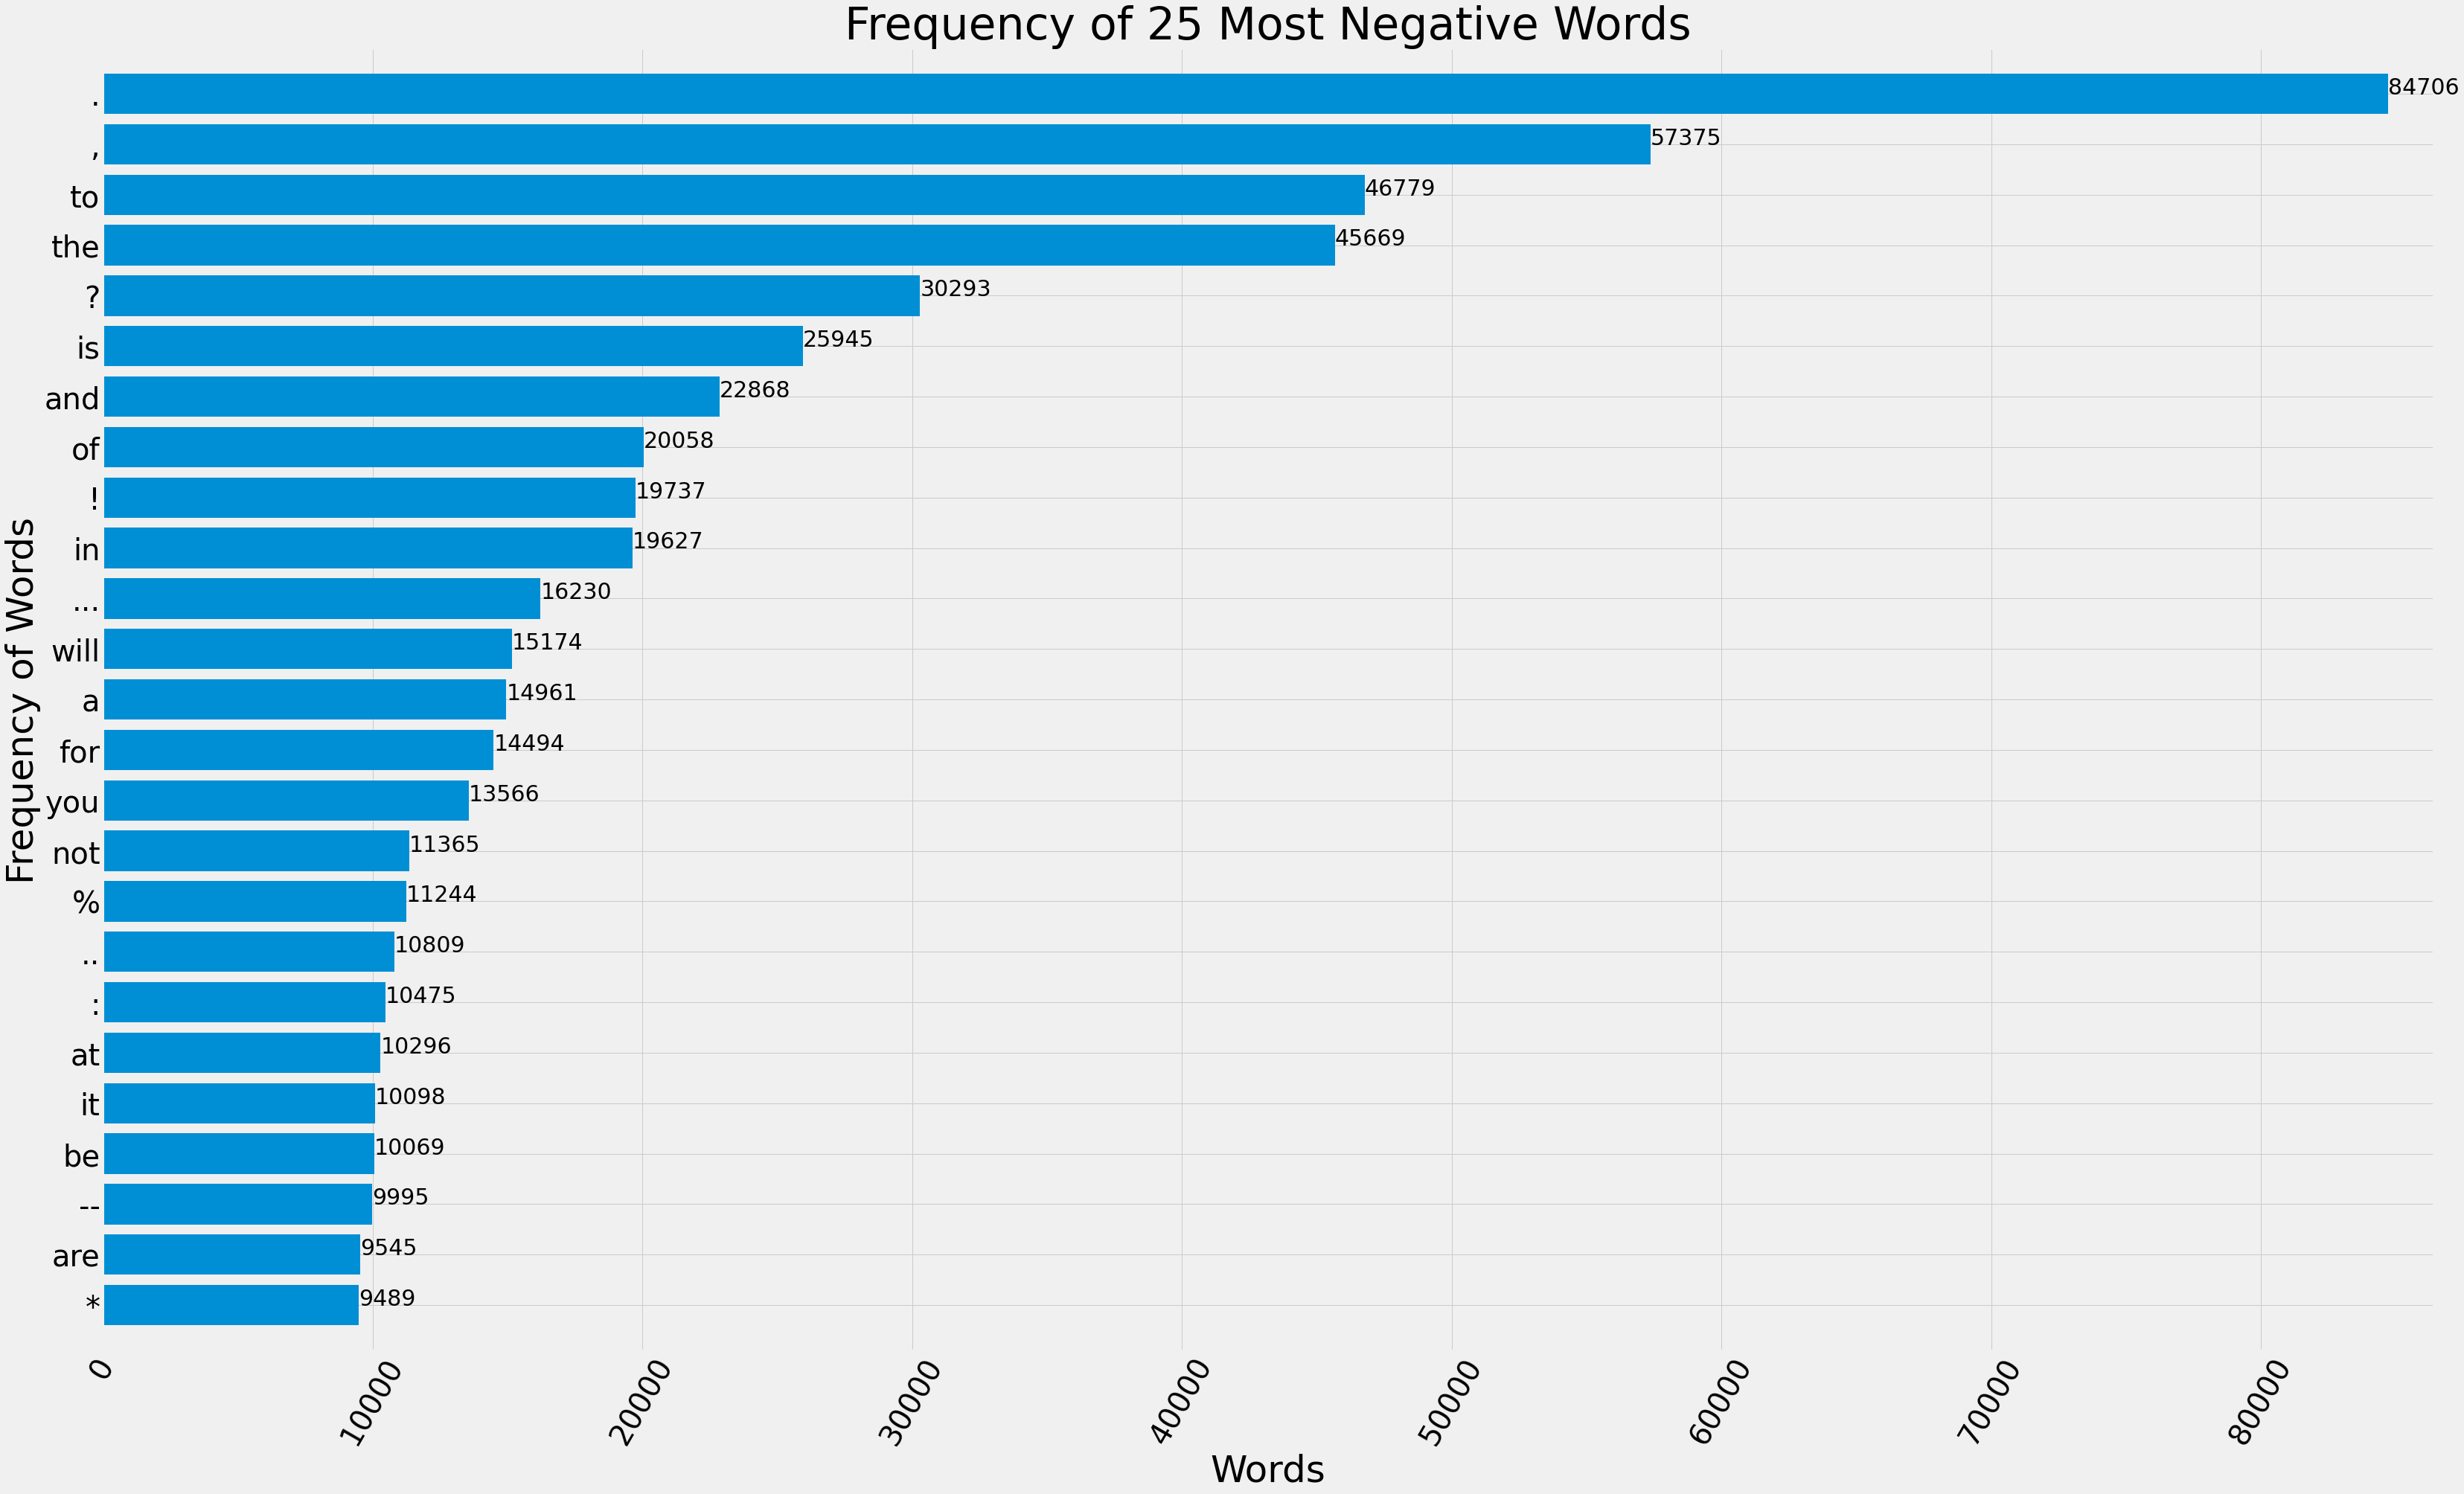

In [13]:
mostcommon_neg = FreqDist(neg_words).most_common(25)
x, y = zip(*mostcommon_neg)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Negative Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

# Data Cleaning

In [14]:
df['text']=df['text'].str.lower()
df['ori']=df['ori'].str.lower()

In [15]:
def cleaning_URLs(data):
#    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', data, flags=re.MULTILINE)
#     return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
# df['text'].head()

In [16]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
# df['text'].head()

In [17]:
df['text'] = df['text'].apply(lambda x: x.replace('’s', ''))
df['text'] = df['text'].apply(lambda x: x.replace('’ve', ''))
df['text'] = df['text'].apply(lambda x: x.replace('’', ''))
df['text'] = df['text'].apply(lambda x: x.replace('“', ''))
df['text'] = df['text'].apply(lambda x: x.replace("\nnk", ''))
# df['text'] = df['text'].str.replace(r"’", '')

In [18]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
# df['text'].head()

In [19]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(lambda x: remove_emoji(x))
# df['text'].head()

In [20]:
stopwordlist = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", 
                "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", 
                "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", 
                "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", 
                "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", 
                "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", 
                "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", 
                "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", 
                "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", 
                "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", 
                "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", 
                "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", 
                "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", 
                "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", 
                "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", 
                "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", 
                "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", 
                "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", 
                "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", 
                "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", 
                "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", 
                "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", 
                "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", 
                "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", 
                "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", 
                "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", 
                "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", 
                "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", 
                "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", 
                "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", 
                "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", 
                "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", 
                "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", 
                "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", 
                "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", 
                "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", 
                "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", 
                "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", 
                "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", 
                "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", 
                "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", 
                "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", 
                "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", 
                "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", 
                "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", 
                "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", 
                "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", 
                "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", 
                "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", 
                "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", 
                "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", 
                "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", 
                "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", 
                "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", 
                "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", 
                "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", 
                "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", 
                "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", 
                "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", 
                "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", 
                "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", 
                "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", 
                "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", 
                "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", 
                "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", 
                "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", 
                "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", 
                "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", 
                "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", 
                "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", 
                "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", 
                "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", 
                "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", 
                "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", 
                "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", 
                "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", 
                "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", 
                "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", 
                "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", 
                "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", 
                "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", 
                "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", 
                "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", 
                "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", 
                "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", 
                "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", 
                "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", 
                "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", 
                "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", 
                "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", 
                "z", "zero", "zi", "zz", 'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an','and','any','are', 
                'as', 'at', 'be', 'because', 'been', 'before','being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each','few', 'for', 'from','further', 'had', 'has', 'have', 'having', 
                'he', 'her', 'here','hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in','into','is', 'it', 
                'its', 'itself', 'just', 'll', 'm', 'ma','me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', 
                "shouldve",'so', 'some', 'such','t', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them','themselves', 
                'then', 'there', 'these', 'they', 'this', 'those','through', 'to', 'too','under', 'until', 'up', 've', 'very', 
                'was','we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom','why', 'will', 'with', 'won', 'y', 
                'you', "youd","youll", "youre","youve", 'your', 'yours', 'yourself', 'yourselves',
                
                'ada','inikah','sampai','adakah','inilah','sana','adakan','itu','sangat','adalah','itukah','sangatlah','adanya','itulah',
                'saya','adapun','jadi','se','agak','jangan','seandainya','agar','janganlah','sebab','akan','jika','sebagai','aku','jikalau',
                'sebagaimana','akulah','jua','sebanyak','akupun','juapun','sebelum','al','juga','sebelummu','alangkah','kalau','sebelumnya',
                'allah','kami','sebenarnya','amat','kamikah','secara','antara','kamipun','sedang','antaramu','kamu','sedangkan','antaranya',
                'kamukah','sedikit','apa','kamupun','sedikitpun','apa-apa','katakan','segala','apabila','ke','sehingga','apakah','kecuali',
                'sejak','apapun','kelak','sekalian','atas','kembali','sekalipun','atasmu','kemudian','sekarang','atasnya','kepada','sekitar','atau',
                'kepadaku','selain','ataukah','kepadakulah','selalu','ataupun','kepadamu','selama','bagaimana','kepadanya','selama-lamanya',
                'bagaimanakah','kepadanyalah','seluruh','bagi','kerana','seluruhnya','bagimu','kerananya','sementara','baginya','kesan','semua',
                'bahawa','ketika','semuanya','bahawasanya','kini','semula','bahkan','kita','senantiasa','bahwa','ku','sendiri','banyak','kurang',
                'sentiasa','banyaknya','lagi','seolah','barangsiapa','lain','seolah-olah','bawah','lalu','seorangpun','beberapa','lamanya',
                'separuh','begitu','langsung','sepatutnya','begitupun','lebih','seperti','belaka','maha','seraya','belum','mahu','sering','belumkah',
                'mahukah','serta','berada','mahupun','seseorang','berapa','maka','sesiapa','berikan','malah','sesuatu','beriman','mana','sesudah',
                'berkenaan','manakah','sesudahnya','berupa','manapun','sesungguhnya','beserta','masih','sesungguhnyakah','biarpun','masing',
                'setelah','bila','masing-masing','setiap','bilakah','melainkan','siapa','bilamana','memang','siapakah','bisa','mempunyai','sini','boleh',
                'mendapat','situ','bukan','mendapati','situlah','bukankah','mendapatkan','suatu','bukanlah','mengadakan','sudah','dahulu','mengapa',
                'sudahkah','dalam','mengapakah','sungguh','dalamnya','mengenai','sungguhpun','dan','menjadi','supaya','dapat','menyebabkan','tadinya',
                'dapati','menyebabkannya','tahukah','dapatkah','mereka','tak','dapatlah','merekalah','tanpa','dari','merekapun','tanya','daripada',
                'meskipun','tanyakanlah','daripadaku','mu','tapi','daripadamu','nescaya','telah','daripadanya','niscaya','tentang','demi','nya','tentu',
                'demikian','olah','terdapat','demikianlah','oleh','terhadap','dengan','orang','terhadapmu','dengannya','pada','termasuk','di','padahal',
                'terpaksa','dia','padamu','tertentu','dialah','padanya','tetapi','didapat','paling','tiada','didapati','para','tiadakah','dimanakah',
                'pasti','tiadalah','engkau','patut','tiap','engkaukah','patutkah','tiap-tiap','engkaulah','per','tidak','engkaupun','pergilah','tidakkah',
                'hai','perkara','tidaklah','hampir','perkaranya','turut','hampir-hampir','perlu','untuk','hanya','pernah','untukmu','hanyalah','pertama',
                'wahai','hendak','pula','walau','hendaklah','pun','walaupun','hingga','sahaja','ya','ia','saja','yaini','iaitu','saling','yaitu','ialah','sama',
                'yakni','ianya','sama-sama','yang','inginkah','samakah','ini','sambil','tu','ni','nak','je','la','kau',
                'dah','yg','kat','makanan']

In [21]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
# df['text'].head()

In [22]:
noiselist =     ['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahaaaaaaaaaaaaaaarrrrrrrrrrrrrrr',
                 'aaaaaaaaaaaaaarrrrrrrrrrr', 'aaaaaaaaarrrrrrrrrrrrrr', 'aaaaaaaarrrrrrrraaaaaaaarrrrrrrrrrrr', 'aaaaarrr', 'aaaaarrrrrr', 
                 'aaaarr', 'aaaarrrraaaat', 'aaacfbeb', 'aaah', 'aaar', 'aaarooon', 'aaarrr', 'aaarrrr', 'aaarrrrrraafe', 'aagain', 'aagb', 'aagtc', 'aah', 'aahhh', 
                 'aaidscdsusdecaabaeab', 'aais', 'aaisa', 'aak', 'aaked', 'aales', 'aameen', 'aamoron', 'aand', 'aang', 'aapl', 'aaplearningsqhtml' ,
                 'aaplteslatslastockspricepercentstocksplits', 'aarh', 'aaron', 'aarontan', 'aaround', 'aasia', 'aasiamight', 'aave', 'aawaah', 'aax',
                 'aaxi', 'aay', 'ab', 'aback', 'abacus', 'abadi', 'aa', 'aaa', 'rt','वेब३','🧵', 'python', 'khuloodalmani', '•', 
                 'iiot','','nctsmtow','kdlexidolpickbestintlartist',
                 "don't",'ramai','banter','let','get','here','g','httpstcotlkwdiiu','httpstcibqusr',
                 'httpstcoofawfyirr','httpstcoakdqztokbw','still','however','etc',"it's",'also','train','hi',
                 'need','u','like','away','im','amp','-','time','make','day','us','way','year',
                 'take','one','sure','sep','£','–','food','lah','ular','leh','kah', 'top', 'glove', 'gloves']

In [23]:
noise = set(noiselist)
def cleaning_noise(text):
    return " ".join([word for word in str(text).split() if word not in noise])
df['text'] = df['text'].apply(lambda text: cleaning_noise(text))
# df['text'].head()

In [24]:
import nltk.corpus
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + ['At', 'v', '3']
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
# df['text'].head()

In [25]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
# df['text'].head()

##### replaces all non-ASCII characters

In [26]:
df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\noeln\AppData\Local\Temp\ipykernel_30056\661492659.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace(r'[^\x00-\x7F]+', '')


In [27]:
texl70 = df['text']
langdet = []                                                    

for i in range(len(df)):
    try:
        lang=detect(texl70[i])                                      
    except:
        lang='no'
        print("This row throws error:", texl70[i], "row", i)                 
langdet.append(lang) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
langdet

['no']

In [29]:
df.iloc[153]

Unnamed: 0                       153
Date                      2019-08-16
Open                        1.486666
High                        1.496666
Low                         1.486666
Close                           1.49
Adj Close                   1.306037
Volume                       3957000
text                                
Difference                   0.22426
label                       Positive
ori             顶级手套预计2020财年营业额增长会更好
eda           [顶级手套预计2020财年营业额增长会更好]
Name: 153, dtype: object

In [31]:
from langdetect import detect

df['Languagereveiw'] = df['text'].apply(detect)

In [32]:
df['Languagereveiw'].value_counts()

en    702
it     13
id      5
sv      2
es      2
so      2
af      1
fr      1
da      1
ca      1
et      1
sl      1
pt      1
vi      1
nl      1
no      1
tl      1
Name: Languagereveiw, dtype: int64

##### remove non-English words

In [33]:
import nltk

words = set(nltk.corpus.words.words())

df['text'] = df['text'].apply(lambda x: " ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))

In [35]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))

## POS tagging & ngram

In [43]:
df['pos'] =df['text'].apply(lambda x: nltk.word_tokenize(x))
df['pos'] = df['pos'].apply(lambda x: nltk.pos_tag(x))
df['filtered'] = df['pos'].apply(lambda x: [word for word,pos in x \
                                            if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
                                                or pos == 'RB' or pos == 'RBR' or pos == 'RBS' 
                                                or pos == 'JJ' or pos == 'JJR' or pos == 'JJS' 
                                                or pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ')])
# df['filtered'] = df['filtered'].apply(lambda x: nltk.pos_tag(x))

In [44]:
df['counts'] = df['pos'].apply(lambda x: counter(tag for word,  tag in x))

In [45]:
df['bigram'] = df['filtered'].apply(lambda x: list(nltk.bigrams(x)))
df['trigram'] = df['filtered'].apply(lambda x: list(nltk.trigrams(x)))

In [46]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,text,Difference,label,ori,eda,Languagereveiw,pos,filtered,counts,bigram,trigram
0,0,2019-01-02,1.873333,1.893333,1.853333,1.860000,1.602780,4561800,opening bell kan sell dont patience dont naggi...,-0.711726,Negative,first day opening bell already keong kan liao...,"[first, day, opening, bell, already, keong, ka...",id,"[(opening, VBG), (bell, NN), (kan, NNS), (sell...","[opening, bell, kan, sell, dont, patience, don...","{'VBG': 2, 'NN': 6, 'NNS': 2, 'VBP': 1, 'JJ': 4}","[(opening, bell), (bell, kan), (kan, sell), (s...","[(opening, bell, kan), (bell, kan, sell), (kan..."
1,1,2019-01-03,1.866666,1.883333,1.850000,1.850000,1.594163,6920400,dividend payment small,-0.892822,Negative,when is the dividend payout this year? ex da...,"[when, is, the, dividend, payout, this, year, ...",id,"[(dividend, NN), (payment, NN), (small, JJ)]","[dividend, payment, small]","{'NN': 2, 'JJ': 1}","[(dividend, payment), (payment, small)]","[(dividend, payment, small)]"
2,2,2019-01-04,1.856666,1.860000,1.836666,1.846666,1.591290,5903400,bad drop recession sell sad loss,-0.538600,Negative,bad drop recession sell sad loss,"[bad, drop, recession, sell, sad, loss]",es,"[(bad, JJ), (drop, NN), (recession, NN), (sell...","[bad, drop, recession, sell, sad, loss]","{'JJ': 2, 'NN': 3, 'VBP': 1}","[(bad, drop), (drop, recession), (recession, s...","[(bad, drop, recession), (drop, recession, sel..."
3,3,2019-01-07,1.853333,1.860000,1.750000,1.766666,1.522354,40581900,low drop bought pray company tumbling edge wee...,-4.676278,Negative,kenanga the best ib? not enof low. drop so ...,"[Kenanga, the, best, IB, ?, not, enof, low, .,...",en,"[(low, JJ), (drop, NN), (bought, VBD), (pray, ...","[low, drop, bought, pray, company, tumbling, e...","{'JJ': 12, 'NN': 28, 'VBD': 6, 'VBG': 1, 'NNS'...","[(low, drop), (drop, bought), (bought, pray), ...","[(low, drop, bought), (drop, bought, pray), (b..."
4,4,2019-01-08,1.766666,1.766666,1.670000,1.676666,1.444800,67871700,technical rebound tomorrow morning bit rebound...,-5.094342,Negative,"hopefully technical rebound tomorrow, morning...","[Hopefully, technical, rebound, tomorrow, ,, m...",en,"[(technical, JJ), (rebound, NN), (tomorrow, NN...","[technical, rebound, tomorrow, morning, bit, r...","{'JJ': 39, 'NN': 130, 'VB': 7, 'VBD': 7, 'NNS'...","[(technical, rebound), (rebound, tomorrow), (t...","[(technical, rebound, tomorrow), (rebound, tom..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,732,2021-12-24,2.160000,2.220000,2.130000,2.190000,2.190000,12155800,good morning upper hand business profitable an...,1.388889,Positive,good morning all who will have the upper hand...,"[Good, morning, all, who, will, have, the, upp...",en,"[(good, JJ), (morning, NN), (upper, JJ), (hand...","[good, morning, upper, hand, business, profita...","{'JJ': 123, 'NN': 260, 'VBP': 32, 'NNS': 21, '...","[(good, morning), (morning, upper), (upper, ha...","[(good, morning, upper), (morning, upper, hand..."
733,733,2021-12-27,2.250000,2.450000,2.210000,2.360000,2.360000,38963400,counter hard replace dragon head position simp...,4.888889,Positive,"@ularsawi, klci sudah bocor sebab glove coun...","[@, UlarSawi, ,, Klci, sudah, bocor, sebab, gl...",en,"[(counter, RB), (hard, JJ), (replace, VB), (dr...","[counter, hard, replace, dragon, head, positio...","{'RB': 21, 'JJ': 223, 'VB': 10, 'NN': 470, 'NN...","[(counter, hard), (hard, replace), (replace, d...","[(counter, hard, replace), (hard, replace, dra..."
734,734,2021-12-28,2.370000,2.410000,2.300000,2.370000,2.370000,18604700,green industry depend covid survive covid esse...,0.000000,Neutral,lets go topglove ! green d gloves industry ...,"[Lets, go, Topglove, !, Green, d, Gloves, indu...",en,"[(green, JJ), (industry, NN), (depend, NN), (c...","[green, industry, depend, covid, survive, covi...","{'JJ': 187, 'NN': 410, 'VB': 15, 'VBP': 35, 'R...","[(green, industry), (industry, depend), (depen...","[(green, i

## EDA

In [47]:
df['label'].value_counts()

Negative    393
Positive    291
Neutral      53
Name: label, dtype: int64

In [48]:
words = df['filtered']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
pos_tweets = df['filtered'][df["label"] == 'Positive']
pos_words = []
for wordlist in pos_tweets:
    pos_words += wordlist
# print(pos_words)

In [50]:
neg_tweets = df['filtered'][df["label"] == 'Negative']
neg_words = []
for wordlist in neg_tweets:
    neg_words += wordlist
# print(neg_words)

In [51]:
neu_tweets = df['filtered'][df["label"] == 'Neutral']
neu_words = []
for wordlist in neu_tweets:
    neu_words += wordlist
# print(neu_words)

In [52]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# mostcommon = FreqDist(allwords).most_common(100)
# wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
# fig = plt.figure(figsize=(30,10), facecolor='white')
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.title('Top 100 Most Common Words', fontsize=100)
# plt.tight_layout(pad=0)
# plt.show()

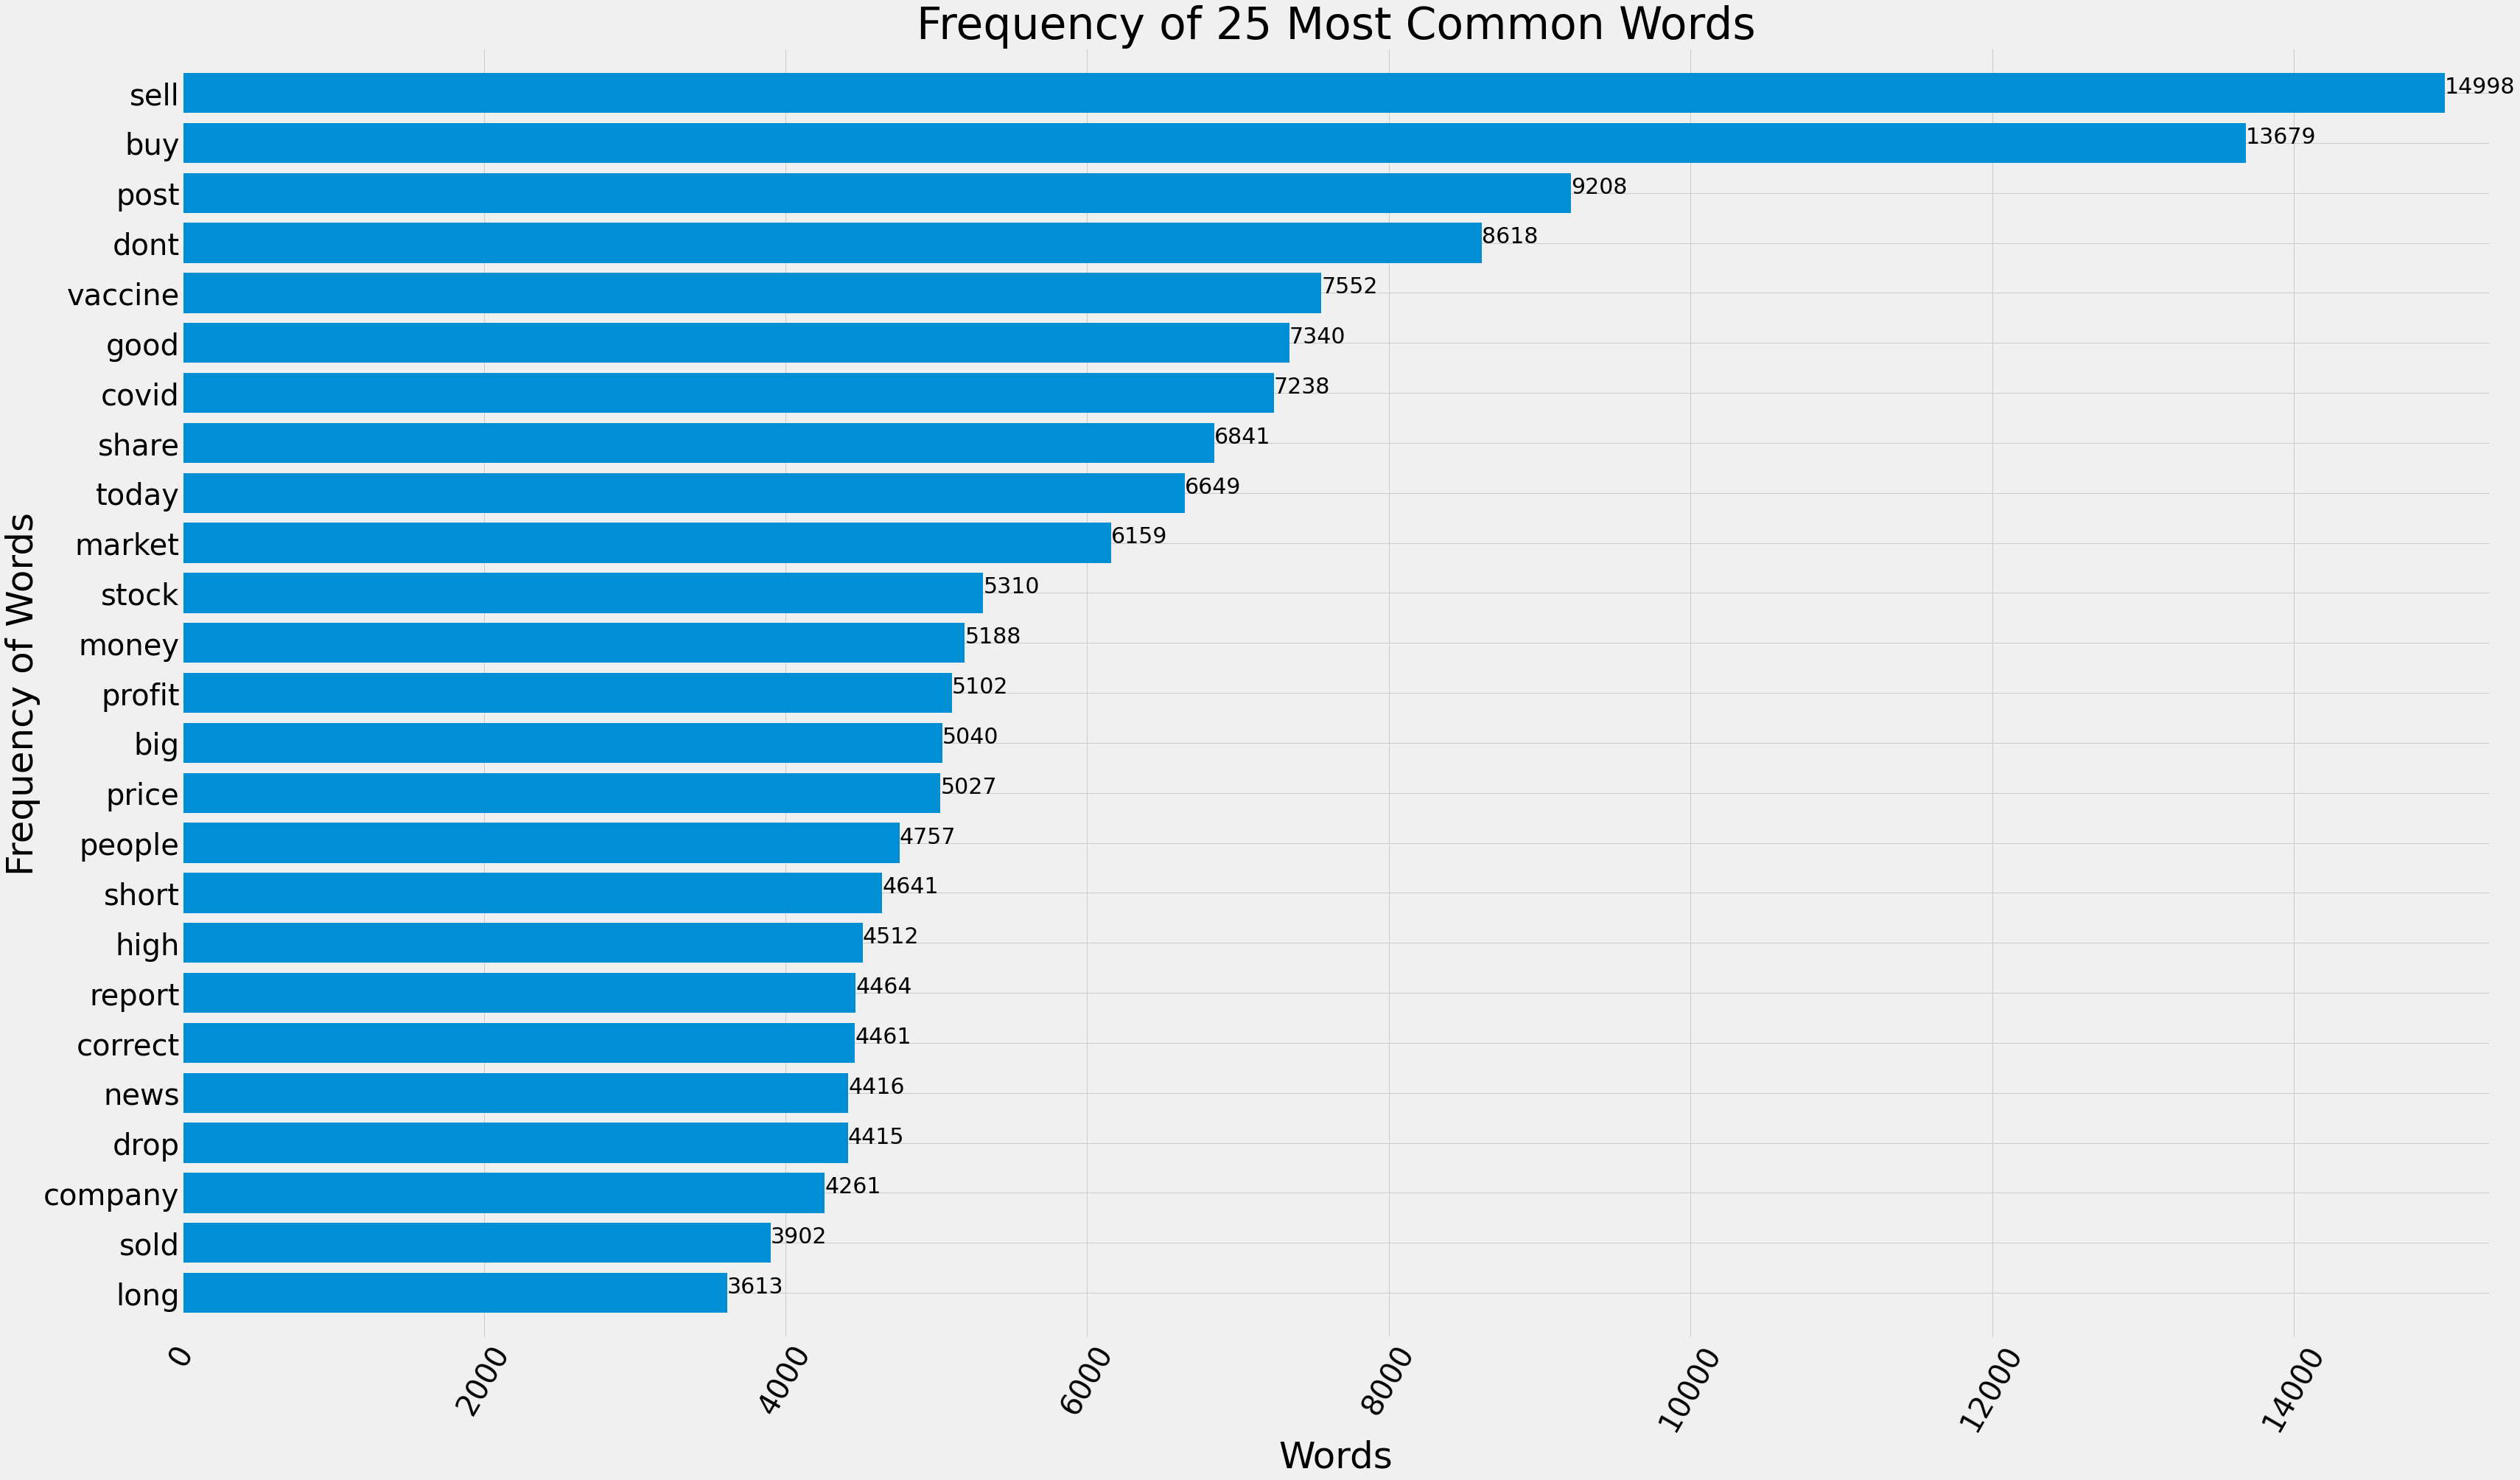

In [53]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

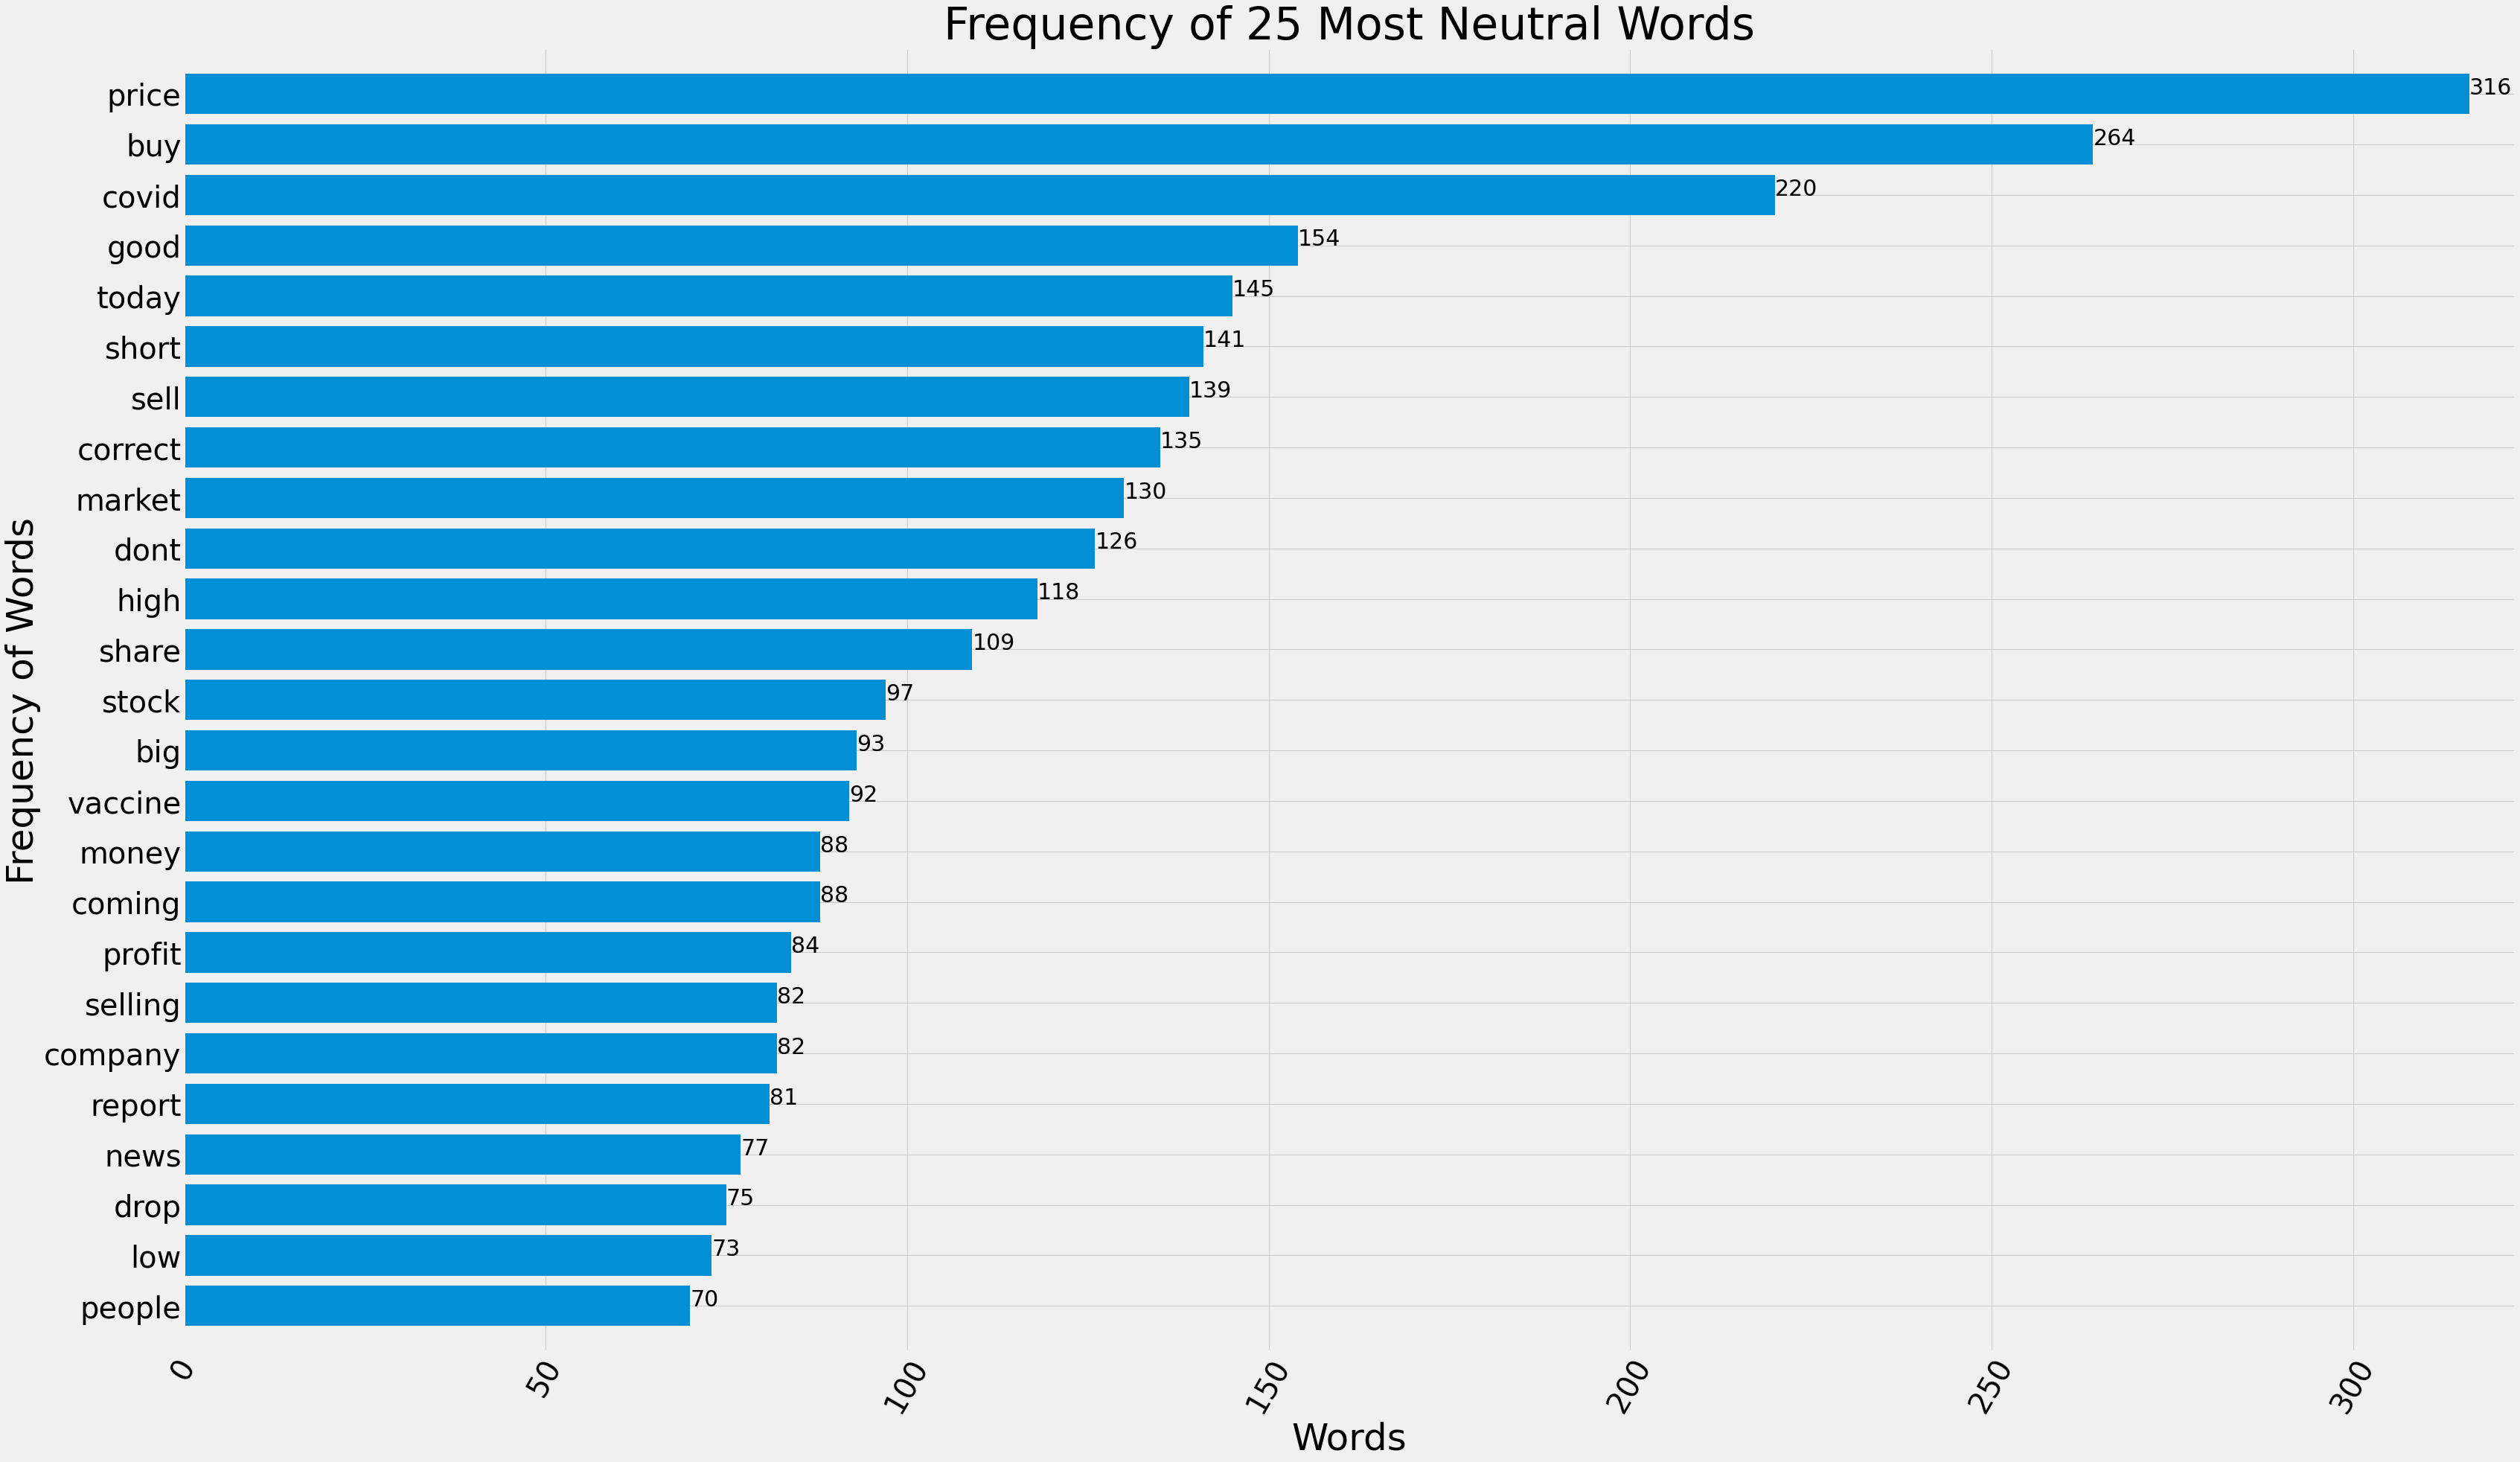

In [54]:
mostcommon_small = FreqDist(neu_words).most_common(25)
x, y = zip(*mostcommon_small)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Neutral Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

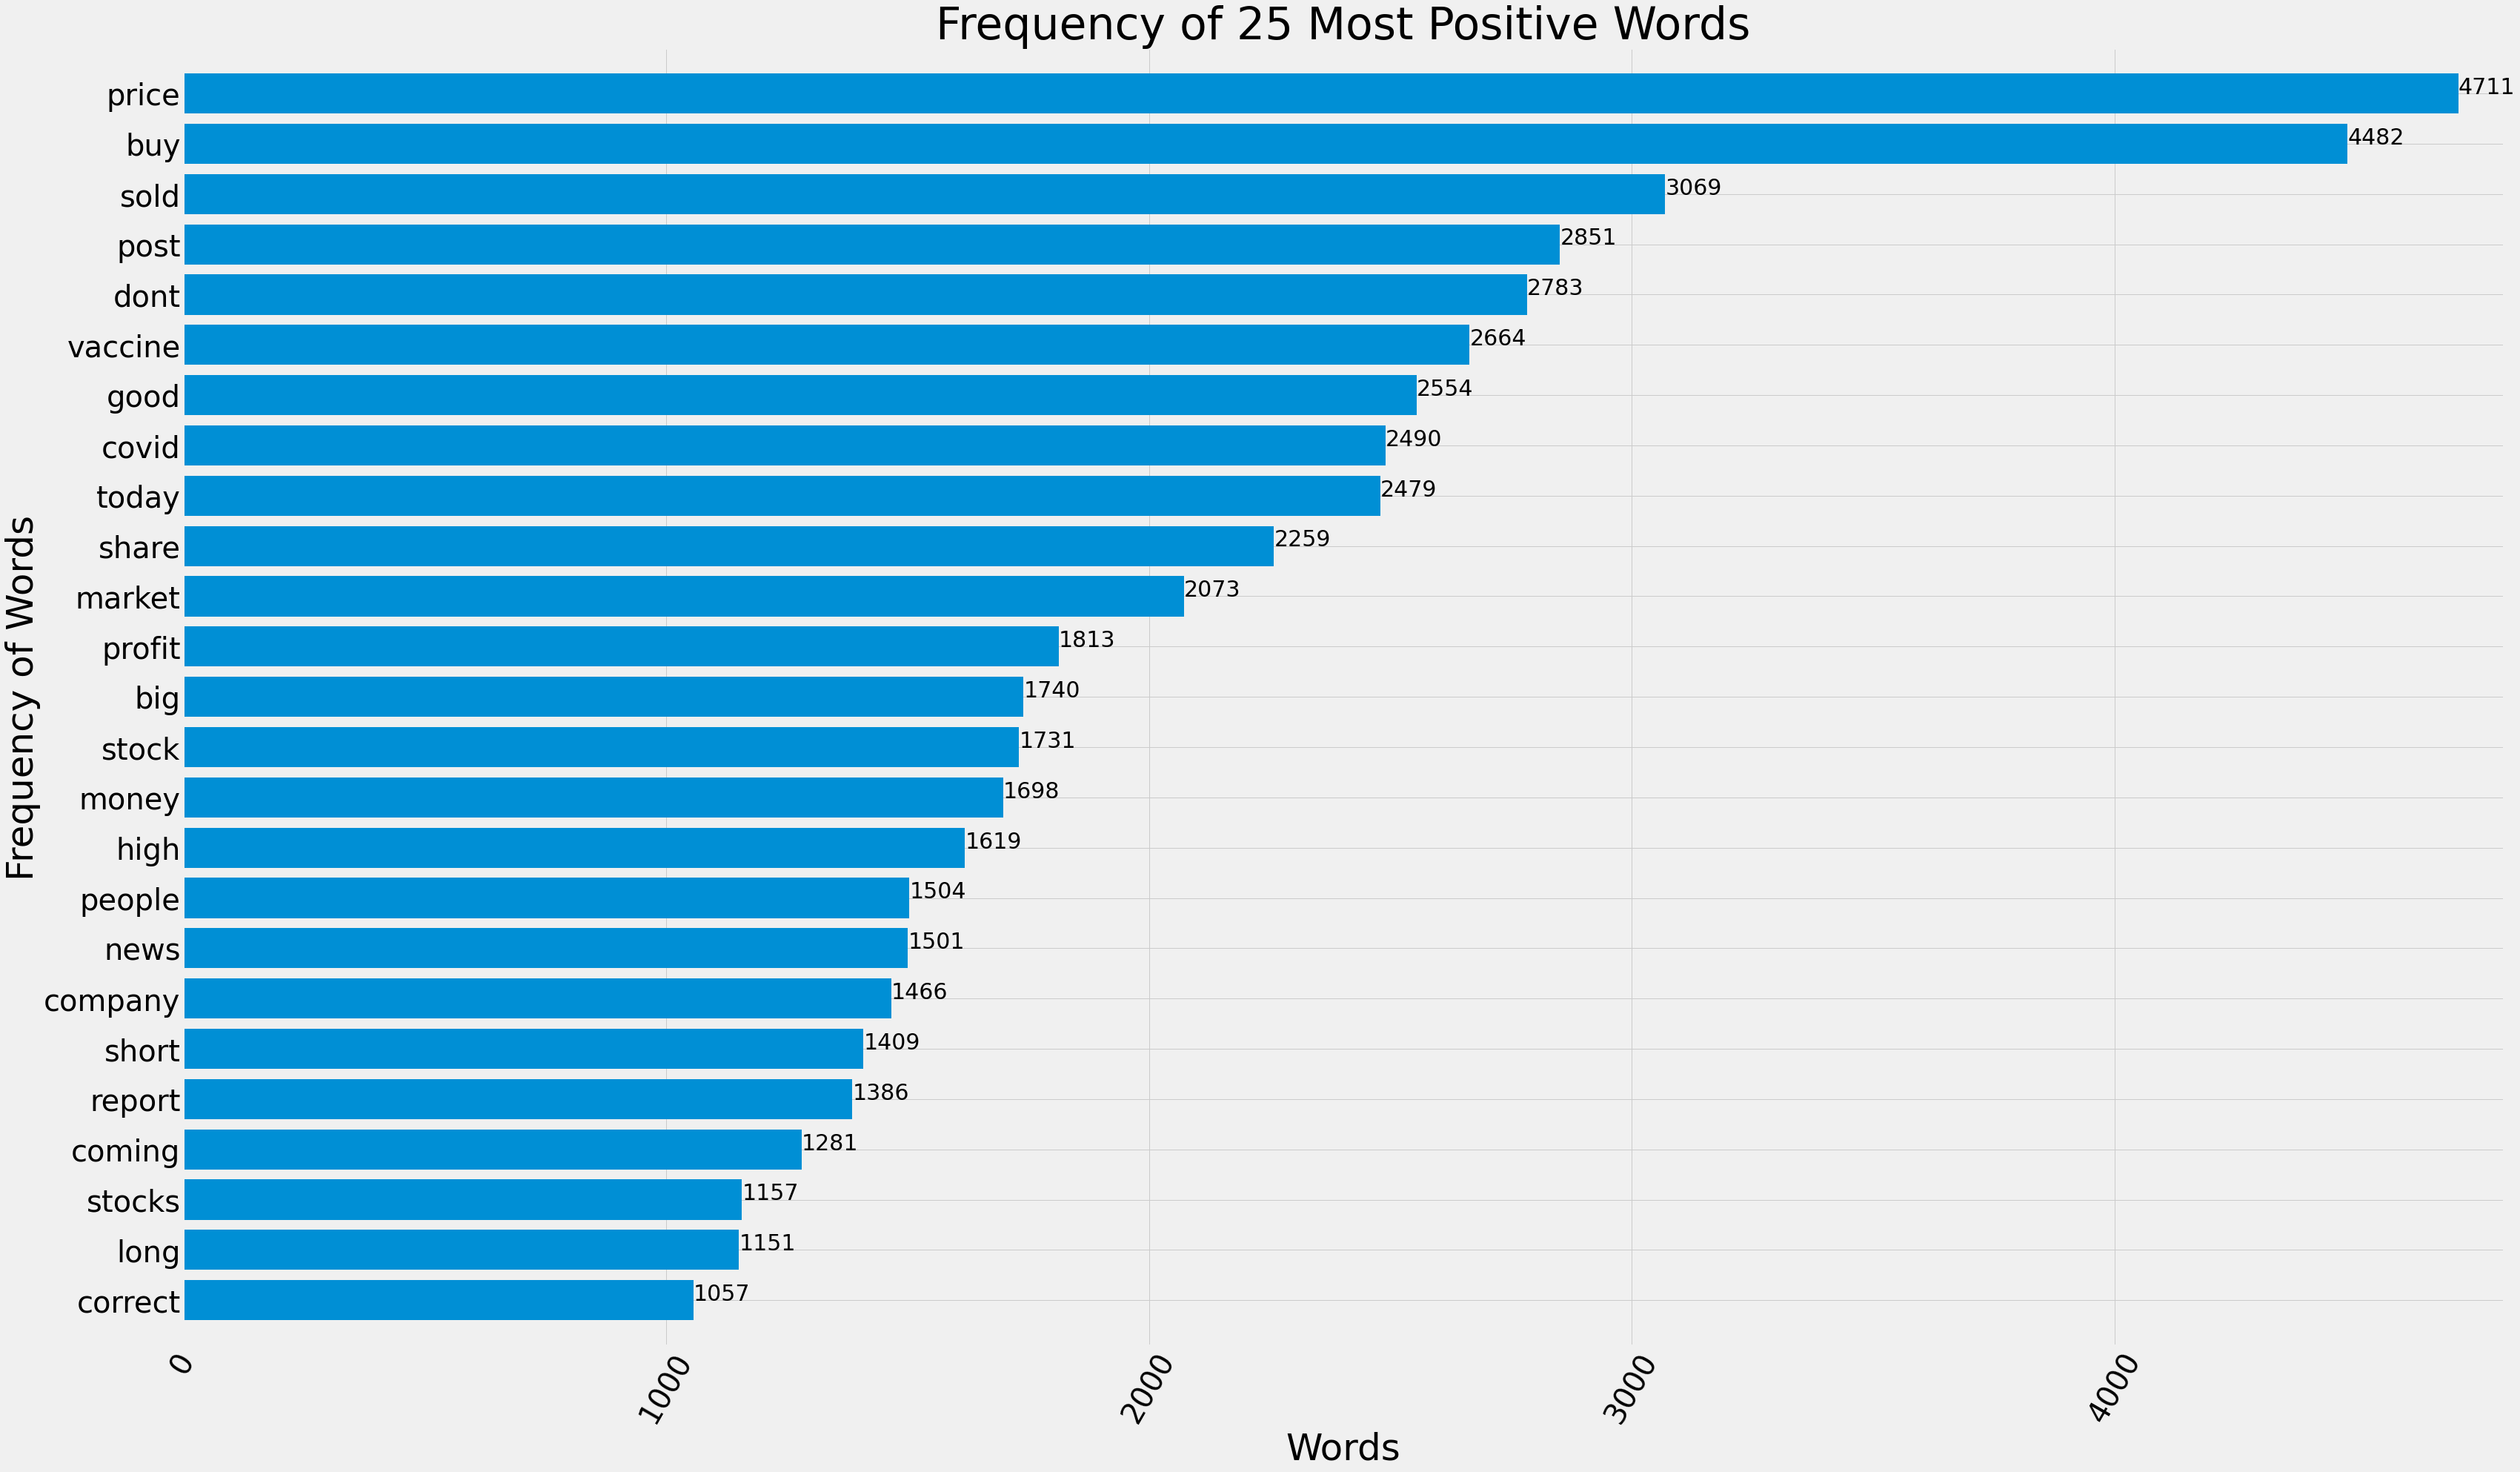

In [55]:
mostcommon_pos = FreqDist(pos_words).most_common(25)
x, y = zip(*mostcommon_pos)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Positive Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

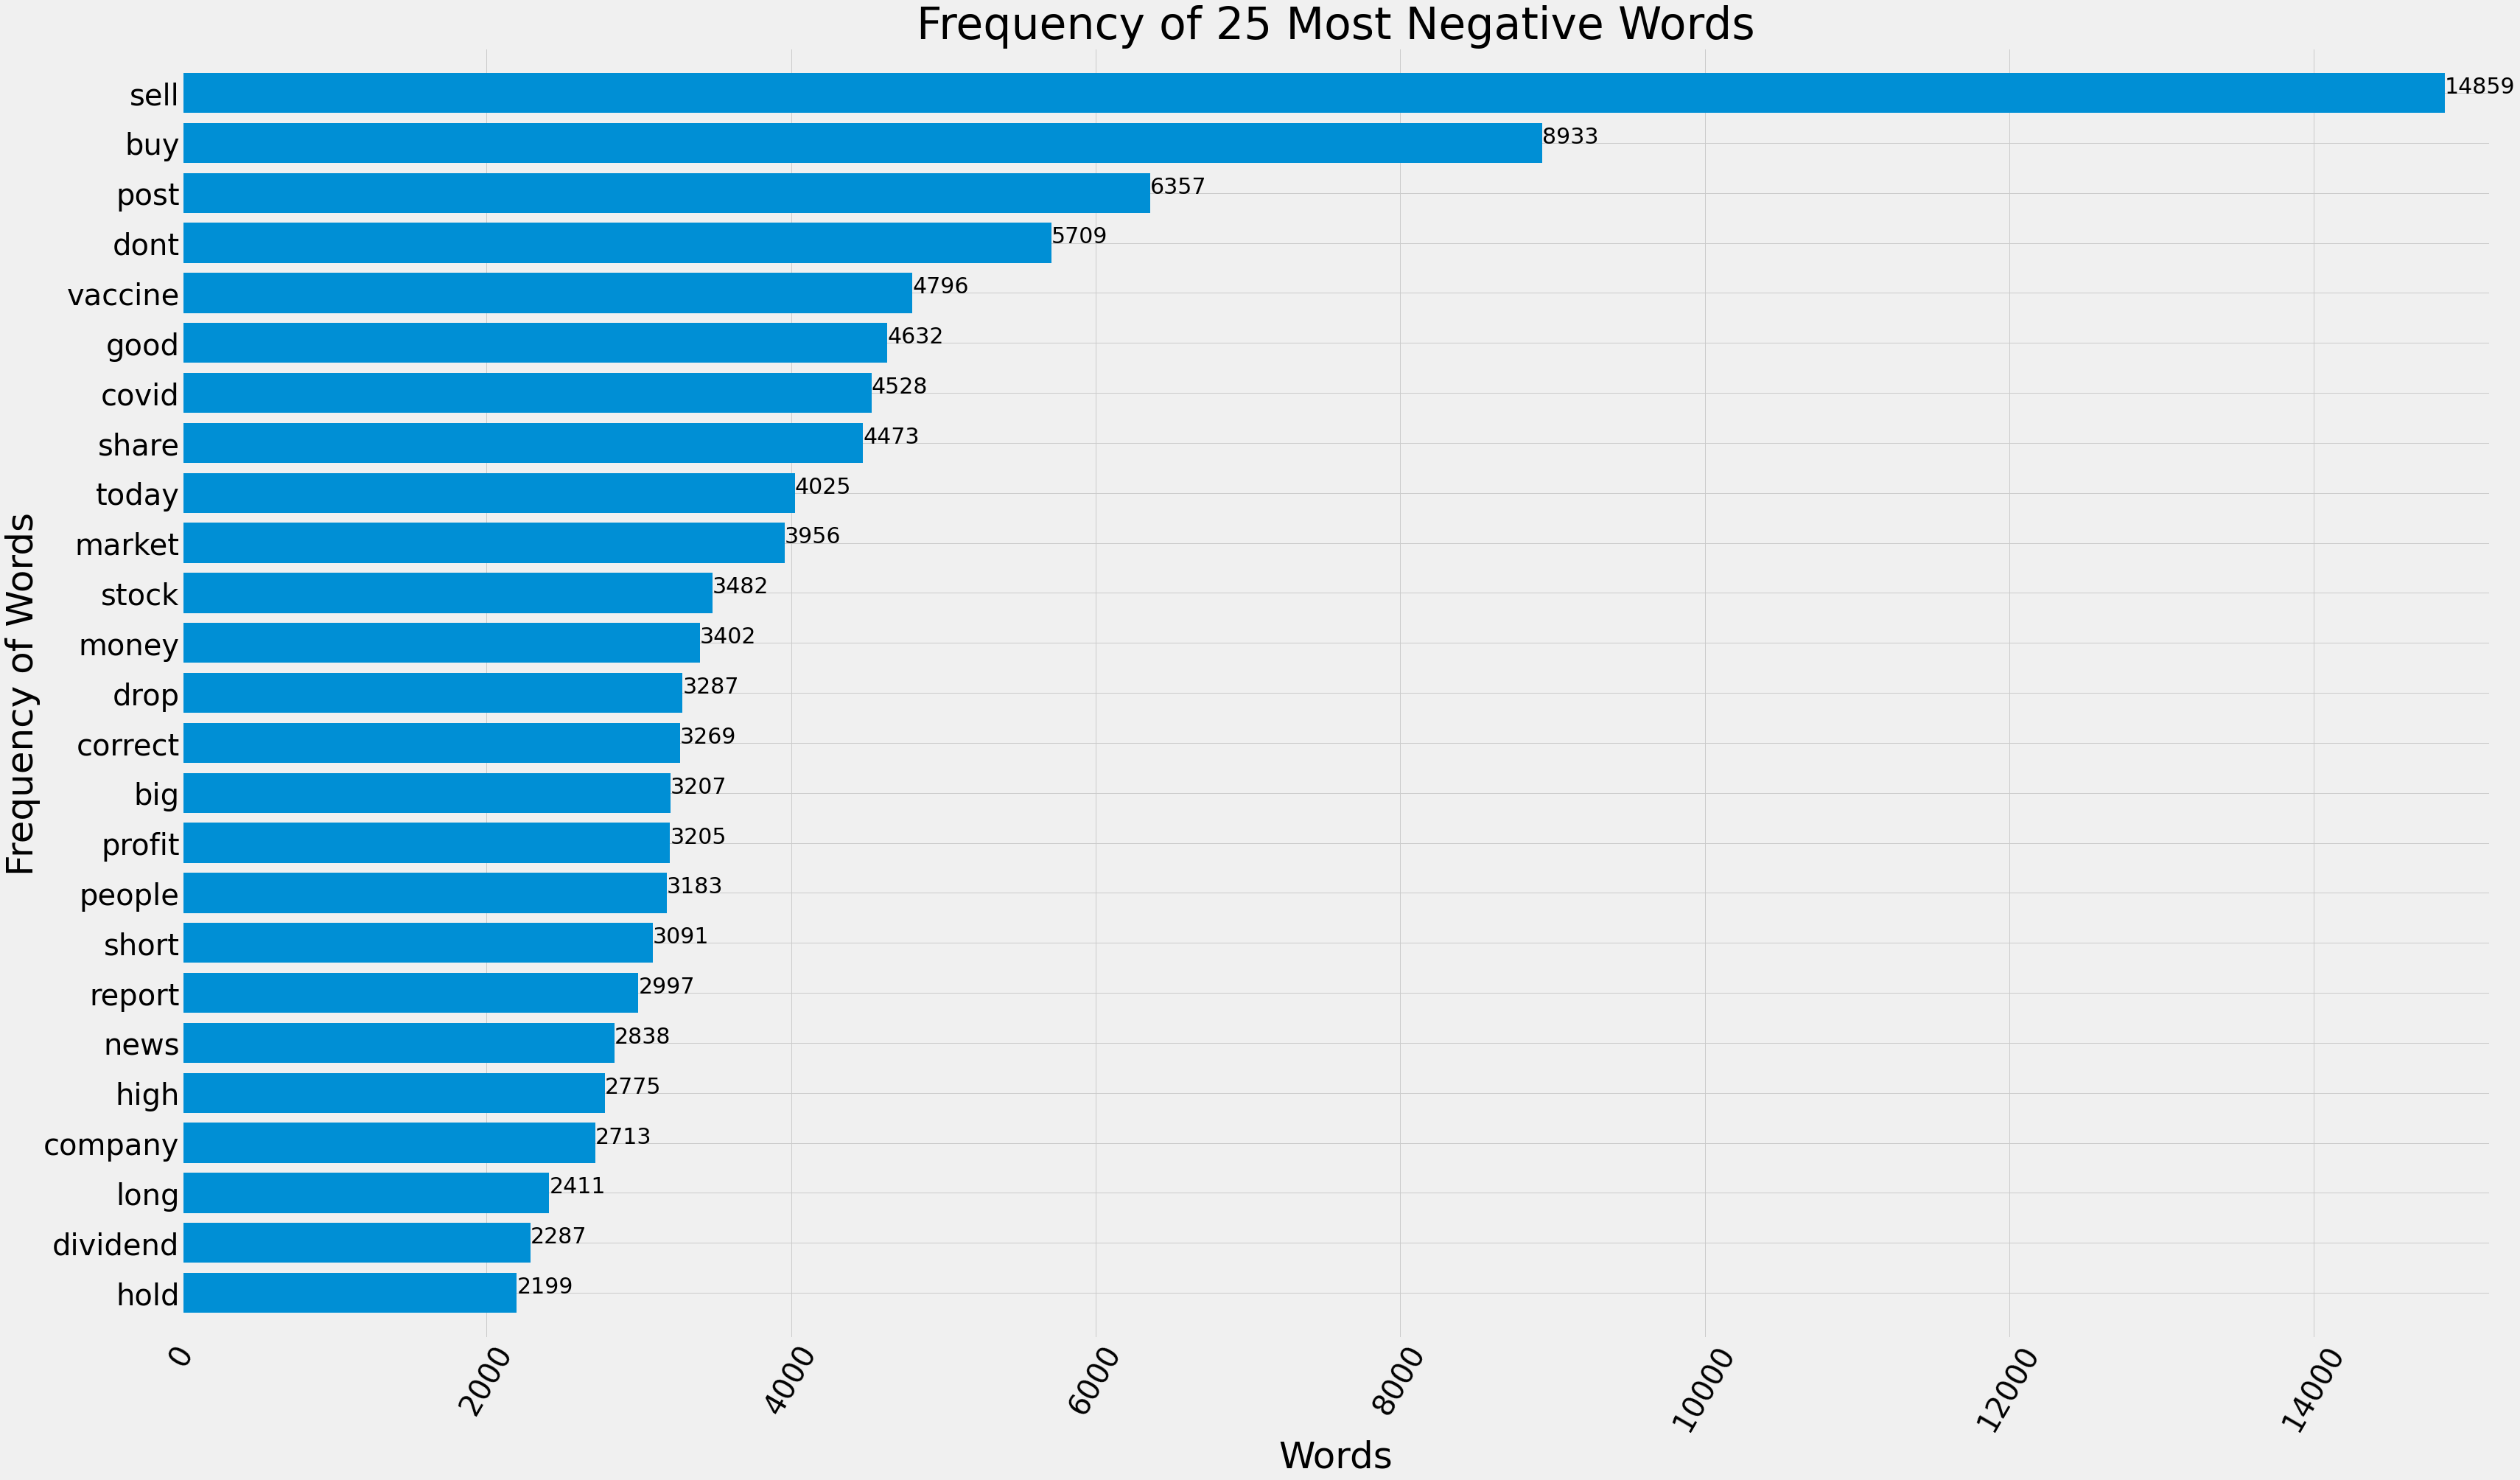

In [56]:
mostcommon_neg = FreqDist(neg_words).most_common(25)
x, y = zip(*mostcommon_neg)
x = reversed(x)
y = reversed(y)
x = tuple(x)
y = tuple(y)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.barh(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Negative Words', fontsize=60)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize = 30)
plt.show()

C:\Users\noeln\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]),
 [Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')])

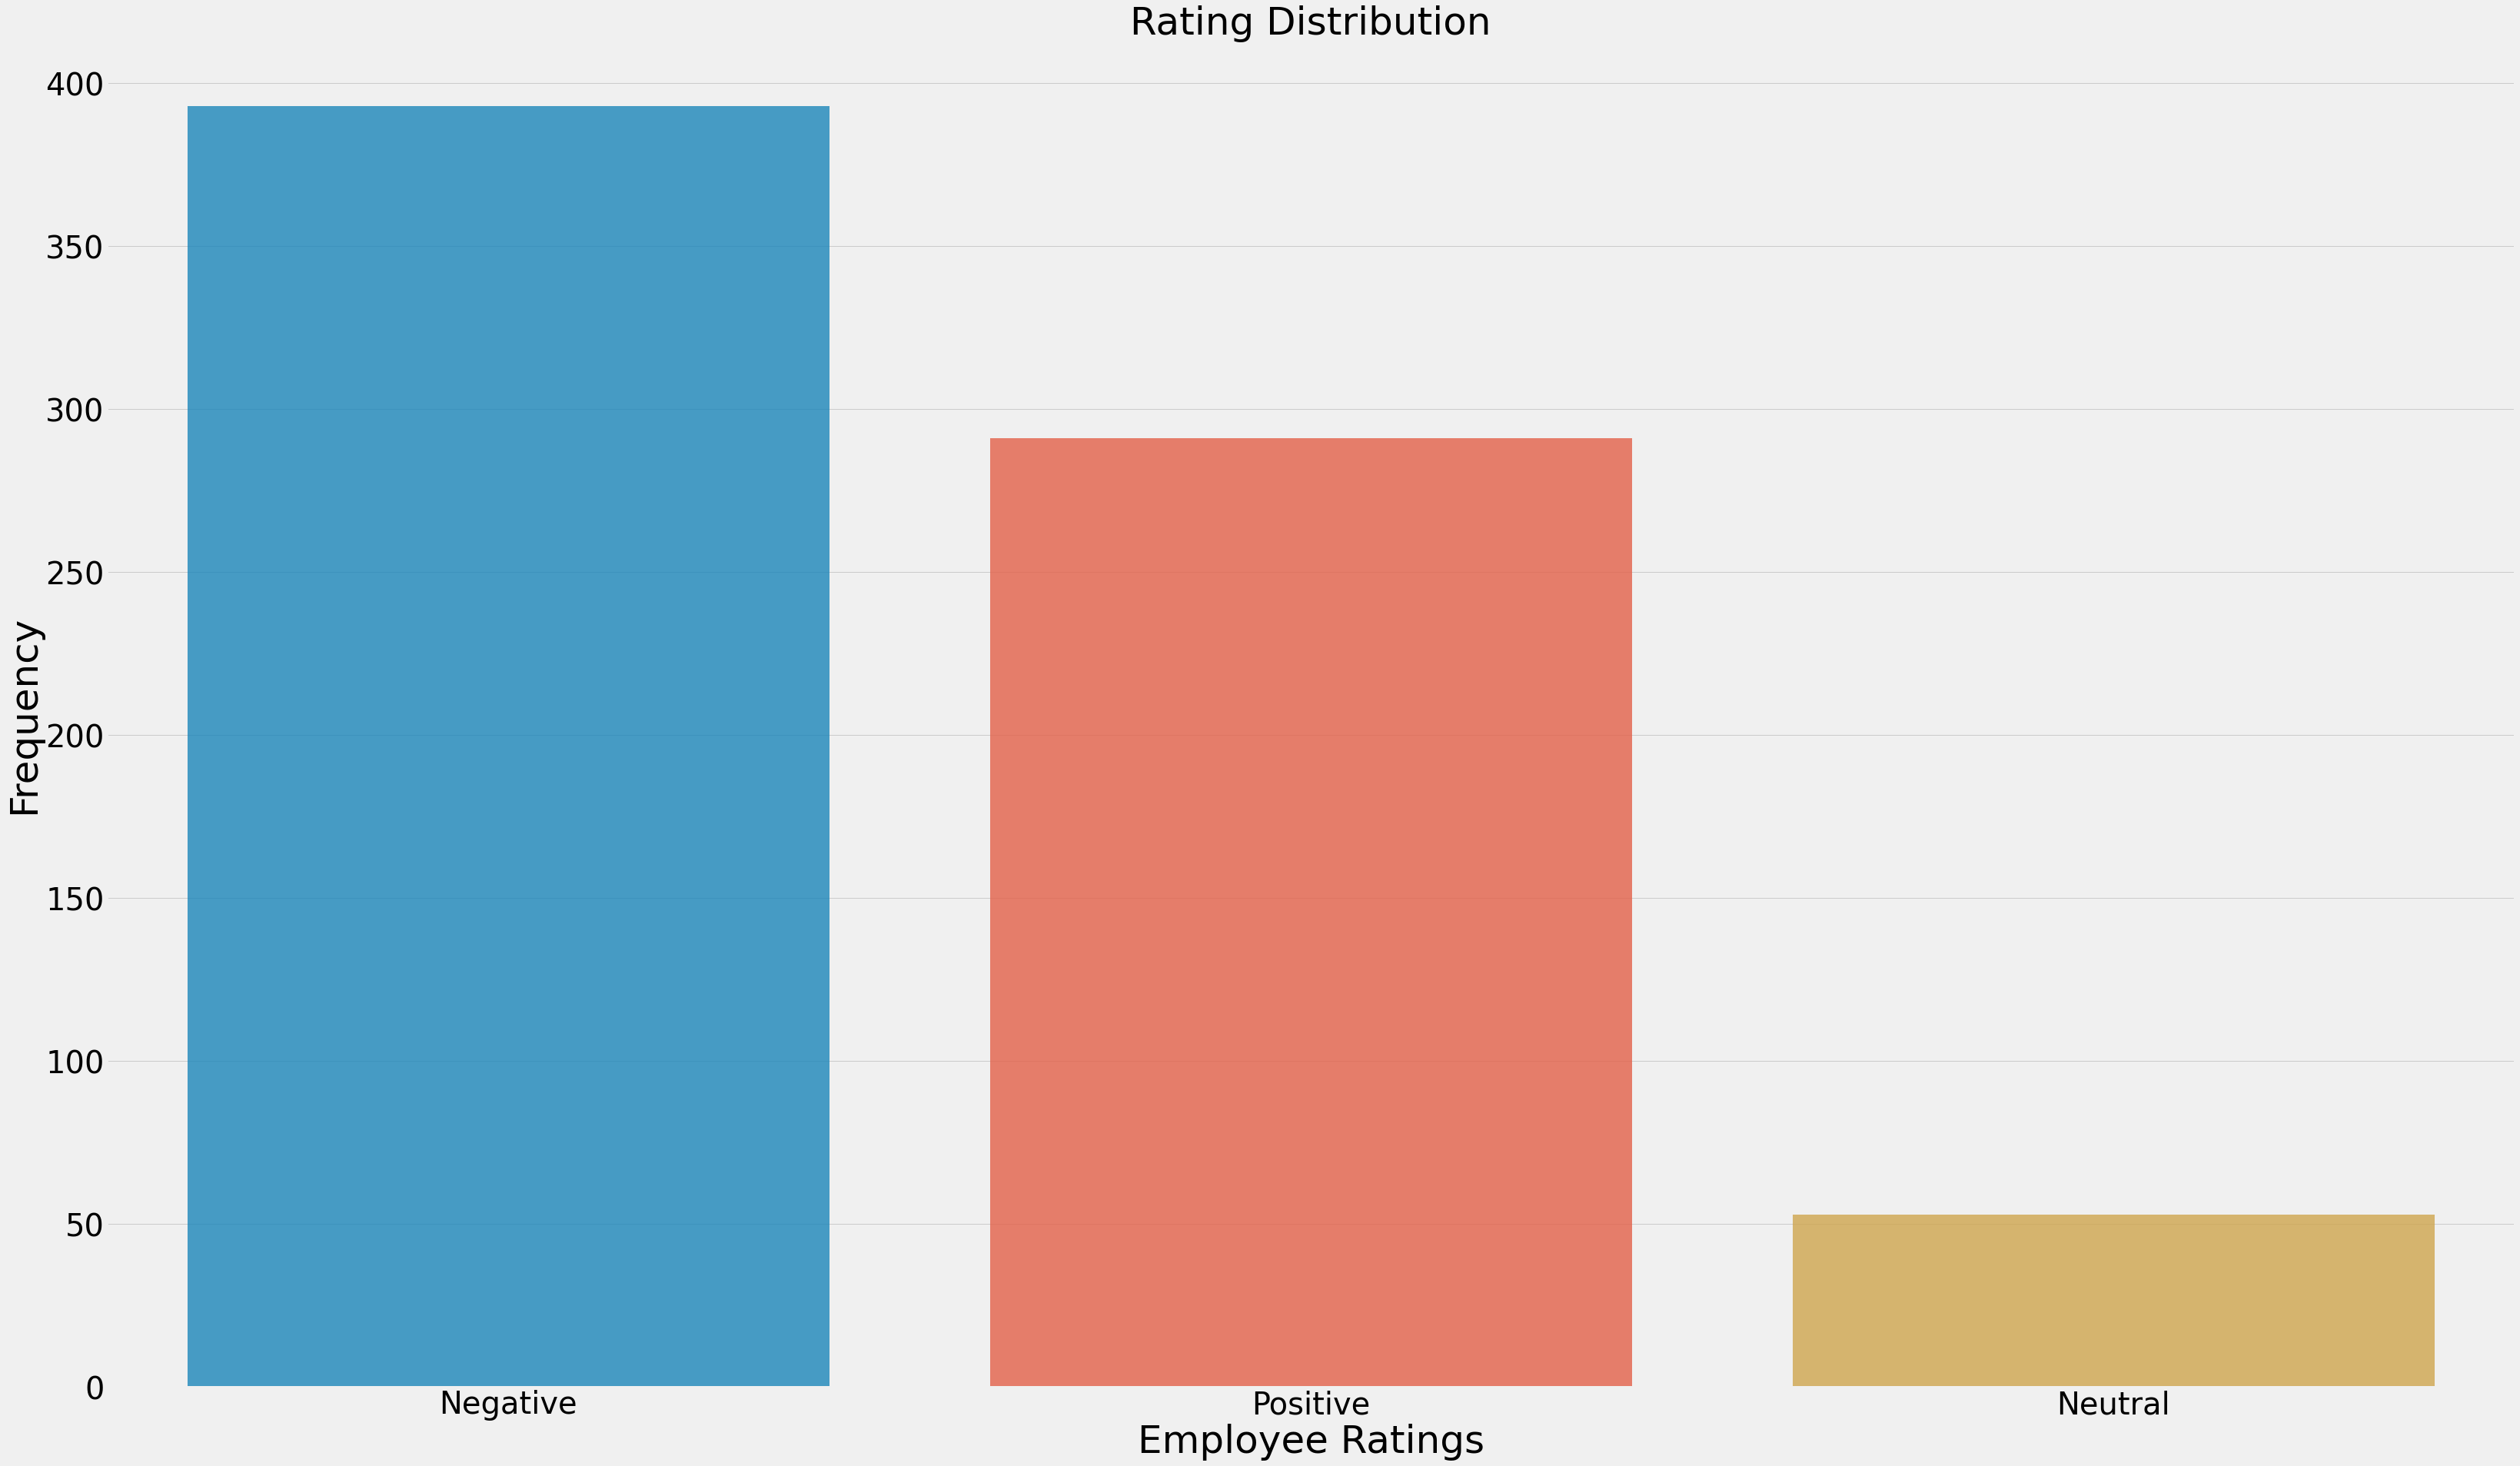

In [57]:
x_rating = df.label.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)

In [58]:
# # Advertisement
# local = df[df['ori'].str.contains('% off | follow us | offering | order now | click the link')] #select
# # df = df[df["text"].str.contains("local|malaysia") == False] #drop
# local

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='label'>

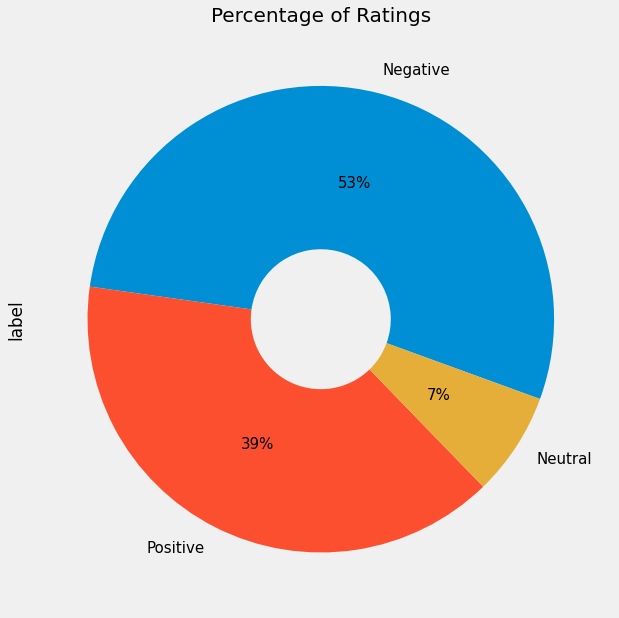

In [59]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.label.value_counts().plot(kind='pie', labels=['Negative', 'Positive', 'Neutral'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

## Modelling

In [60]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [61]:
X = df['filtered']
y = df['label']

sentiment_encode = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
sentiment_decode = {0 : 'Negative', 1 : 'Positive', 2 : 'Neutral'}

y = y.map(sentiment_encode)

### Feature Representation

In [62]:
# Feature Extraction for fullname
# cv = CountVectorizer(binary=True,analyzer=lambda x: x) #binary
# cv = CountVectorizer(analyzer=lambda x: x)            #term frequency
cv = TfidfVectorizer(analyzer=lambda x: x)            #term frequency inverse document frequency

# training data
X = cv.fit_transform(X)

In [63]:
# feature_names = cv.get_feature_names_out()
# dense = X.todense()
# denselist = dense.tolist()
# visualise = pd.DataFrame(denselist, columns=feature_names)
# visualise

#### Truncated SVD

In [64]:
# from sklearn.decomposition import TruncatedSVD
# # specify the no of output features
# tsvd = TruncatedSVD(n_components=800)
 
# # apply the truncatedSVD function
# X = tsvd.fit(X).transform(X)
# print(X)
 
# # shape of the reduced matrix
# print(X.shape)

In [65]:
# var_explained = tsvd.explained_variance_ratio_.sum()

In [66]:
# var_explained

#### ChiSquare

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=500)
X = chi2_selector.fit_transform(X, y)
print(X)

  (0, 116)	0.22978032750256705
  (0, 273)	0.5737568978512301
  (0, 125)	0.24453960176568482
  (0, 384)	0.14834868097668685
  (1, 402)	0.4421843399889645
  (1, 308)	0.7972993804900795
  (1, 123)	0.4108365944492518
  (2, 242)	0.32571181596601856
  (2, 373)	0.4259306807952958
  (2, 350)	0.6588644427623841
  (2, 131)	0.27222135602117736
  (2, 16)	0.306442356911356
  (2, 384)	0.33223655635313804
  (3, 489)	0.0725104604656643
  (3, 53)	0.06048431803662266
  (3, 215)	0.1684058971364732
  (3, 56)	0.09108130493901115
  (3, 240)	0.07162322576554817
  (3, 459)	0.06452295033591503
  (3, 128)	0.10859120348211504
  (3, 431)	0.10985166158642394
  (3, 263)	0.07140410901802352
  (3, 423)	0.06518489033255391
  (3, 179)	0.1883207739201185
  (3, 176)	0.17602967368498754
  :	:
  (736, 448)	0.008797986406699264
  (736, 244)	0.027916251803180952
  (736, 216)	0.010064903644623351
  (736, 320)	0.018180726410771272
  (736, 323)	0.02072908117320014
  (736, 161)	0.012283146940238875
  (736, 73)	0.0146218130830984

#### Train-test-valid split

In [68]:
# split into 60% training, 20% validating, 20% testing dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42, stratify=y_valid)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [69]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_valid.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(442, 500)
(147, 500)
(148, 500)
0    0.533937
1    0.393665
2    0.072398
Name: label, dtype: float64
0    0.530612
1    0.394558
2    0.074830
Name: label, dtype: float64
0    0.533784
1    0.398649
2    0.067568
Name: label, dtype: float64


#### Smote

In [70]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='label'>

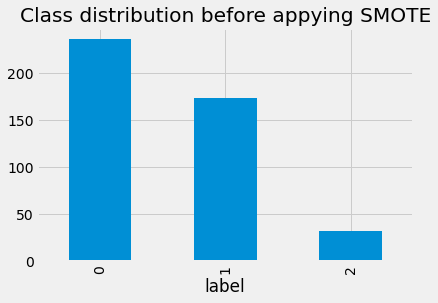

In [71]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution before appying SMOTE', xlabel='label')

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='label'>

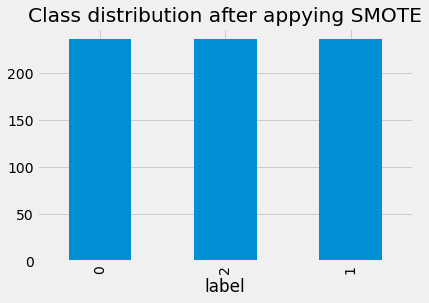

In [72]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='label')

Model: SVC
Accuracy: 0.8581081081081081
F1 overall: 0.7605428329092451
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        79
           1       0.78      0.95      0.85        59
           2       0.80      0.40      0.53        10

    accuracy                           0.86       148
   macro avg       0.84      0.73      0.76       148
weighted avg       0.87      0.86      0.85       148

Model: BernoulliNB
Accuracy: 0.5945945945945946
F1 overall: 0.5512391852919971
              precision    recall  f1-score   support

           0       0.94      0.58      0.72        79
           1       0.94      0.58      0.72        59
           2       0.13      0.80      0.22        10

    accuracy                           0.59       148
   macro avg       0.67      0.65      0.55       148
weighted avg       0.89      0.59      0.68       148

Model: Ridge
Accuracy: 0.8445945945945946
F1 overall: 0.7113323850165956
              p

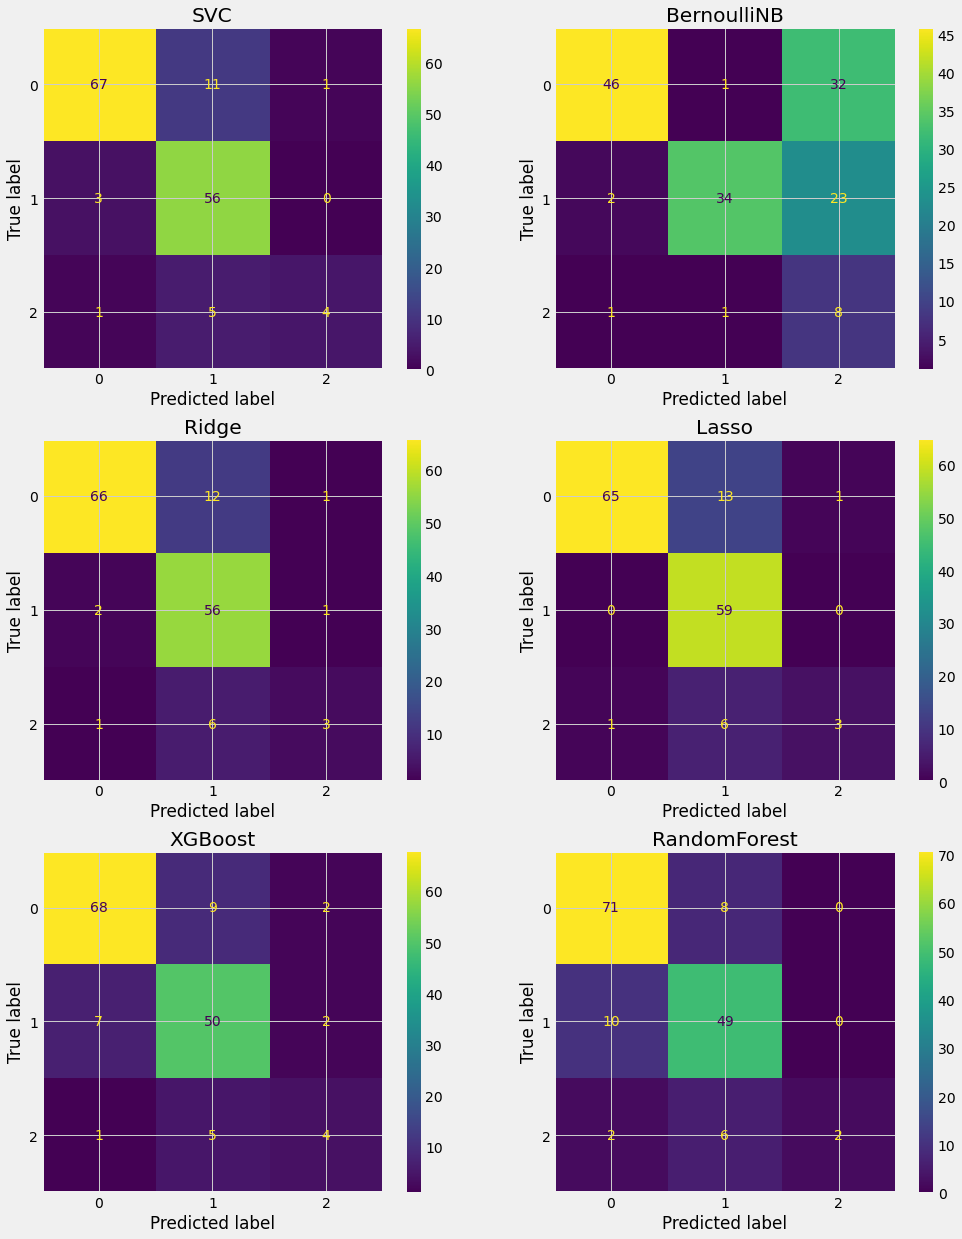

In [73]:
clf_svc = LinearSVC()
clf_nb = BernoulliNB()
clf_lg = LogisticRegression()
clf_ls = LogisticRegression(penalty='l1', solver='liblinear')
clf_xgb = XGBClassifier()
clf_rf = RandomForestClassifier()
clf_lr = LogisticRegression()
clf_knn = KNeighborsClassifier()
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

clfs_name = ['SVC', 'BernoulliNB', 'Ridge', 'Lasso', 'XGBoost', 'RandomForest', 'LogisticsRegression', 'KNN', 'Adaboost']
clfs = [clf_svc, clf_nb, clf_lg, clf_ls, clf_xgb, clf_rf, clf_lr, clf_knn, clf_ada]

fig, axis = plt.subplots(3, 2, figsize=(15, 20))

for name, clf, ax in zip(clfs_name, clfs, axis.flatten()):
    clf.fit(X_resampled,y_resampled)

    pred = clf.predict(X_test)
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy_score(y_test, pred)}')
    print(f"F1 overall: {f1_score(y_test, pred, average='macro')}") #added average -> https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
    print (classification_report(y_test, pred))

    cm = confusion_matrix(y_pred=pred, y_true=y_test, labels=clf.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot(ax=ax)
    ax.title.set_text(name)

plt.show()

In [75]:
# Hyper-Parameter Tuning

# Define model
model = XGBClassifier()

# Define grid
weights = [1, 2, 3, 10, 25, 50]
depth= [ 3, 4, 5, 6, 7, 8]
rate=[0.1 , 0.15, 0.2, 0.3, 0.4]

param_grid = dict(scale_pos_weight=weights, max_depth=depth, learning_rate = rate)

# Define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid.fit(X_valid, y_valid)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

[04:58:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Best: 0.886984 using {'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 1}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 1}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 2}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 3}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 10}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 25}
0.882381 (0.077850) with: {'learning_rate': 0.1, 'max_depth': 3, 'scale_pos_weight': 50}
0.877778 (0.076599) with: {'learning_rate': 0.1, 'max_depth': 4, 'scale_pos_weight': 1}
0.877778 (0.076599) with: {'learning_rate': 0.1, 'max_depth': 4, 'scale_pos_weight': 2}
0.87

In [80]:
# Best: 0.805817 using {'learning_rate': 0.3, 'max_depth': 3, 'scale_pos_weight': 1}
model_1 = XGBClassifier(learning_rate=0.1, max_depth=5, scale_pos_weight=1)
model_1.fit(X_train, y_train)
# plot_importance(model_1)

# Predict and produce accuracy and classification report
pred = model_1.predict(X_test)
# print( "f1-score", f1_score(y_test, pred, average="macro"))
print("Accuracy:", accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[05:11:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

Accuracy: 0.8175675675675675
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        79
           1       0.78      0.83      0.80        59
           2       0.50      0.50      0.50        10

    accuracy                           0.82       148
   macro avg       0.72      0.73      0.72       148
weighted avg       0.82      0.82      0.82       148

